# Project Scoping

## Project Goals
### 1. Data Understanding & Preparation

#### Data Profiling

- Generate summary statistics for numerical features (age, height, income)
- Create frequency distributions for categorical variables (body_type, diet, orientation, etc.)
- Assess completion rates across all fields, with special attention to essays
- Map location data to geographical coordinates for spatial analysis

#### Data Cleaning Strategy
- Develop consistent handling for missing values across different column types
- Create standardized categories for free-text fields (job, education)
- Implement text preprocessing pipeline for the ten essay columns (essay0-essay9)
- Extract timestamps from last_online for recency analysis

### 2. Feature Engineering

#### Demographic Features

- Create age groups and height brackets for simplified analysis
- Develop lifestyle composite indicators (combining drinks, drugs, smokes)
- Generate socioeconomic indicators based on education, income, and job
- Build relationship status indicators including offspring information

#### Text-Based Features

- Map essays to specific topics (self-description, interests, partner preferences)
- Extract named entities from essays (places, activities, media)
- Generate psychometric indicators from text analysis (openness, communication style)
- Quantify text sophistication metrics (vocabulary diversity, structure complexity)

#### Interaction Features

- Create compatibility metrics between stated preferences and personal attributes
- Develop lifestyle compatibility scores
- Build location-based distance or accessibility metrics
- Generate activity and interest overlap measurements

### 3. Exploratory Analysis

#### Demographic Patterns


- Analyze relationship between age, orientation, and relationship preferences
- Examine education and income distributions across different demographics
- Investigate patterns in lifestyle choices (diet, drugs, drinks) by location
- Explore religious and ethnic diversity patterns in the dataset

#### Text Analysis

- Compare essay content patterns across different demographic groups
- Identify distinctive language patterns by age, education, or orientation
- Analyze sentiment differences across essay types
- Explore common interests and activities mentioned across profiles

#### Behavioral Insights

- Analyze profile completeness as an engagement indicator
- Examine last_online patterns for usage behavior insights
- Investigate relationship between profile detail and stated preferences
- Identify correlations between lifestyle choices and relationship status

### 4. Advanced Analytics

#### Classification Models

- Predict undisclosed attributes (income, education) from other profile elements
- Build orientation classifiers based on combined text and demographic features
- Develop relationship status prediction models
- Create active/inactive user classification based on profile characteristics

### Predictive Modeling

- Predict undisclosed attributes based on essay content
- Build classification models for relationship status or preferences
- Create models to predict compatibility between users


#### Clustering & Segmentation

- Develop user personas based on multidimensional clustering
- Identify natural groupings of communication styles from essay content
- Create lifestyle segments combining multiple behavioral indicators
- Generate preference-based segments to guide matching algorithms

#### Recommendation System Development

- Implement content-based filtering using profile similarities
- Develop essay-similarity metrics for text-based matching
- Create tiered recommendation approach combining multiple compatibility factors
- Implement diversity-aware recommendation to avoid homogeneous suggestions

### 5. Implementation & Evaluation

#### Model Evaluation Framework

- Define suitable metrics for each model type (AUC, precision/recall, similarity scores)
- Implement appropriate cross-validation strategies for dating profile data
- Create baseline models for benchmark comparisons
- Design testing framework for recommendation quality assessment

#### Visualization & Reporting

- Develop interactive dashboard for demographic exploration
- Create visualization suite for text analysis insights
- Design geographical visualizations for location-based patterns
- Build comparative visualizations for segment analysis

#### Actionable Insights

- Generate targeted recommendations for profile enhancement
- Develop compatibility scoring system based on multiple attributes
- Create content recommendations for essay improvement
- Provide insights on optimal profile elements for engagement

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import re
import time
import folium
import warnings
import nltk

from collections import defaultdict
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from scipy.stats import gaussian_kde
from scipy import stats
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from datetime import datetime

from tqdm.notebook import tqdm
%matplotlib inline

warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
############################################################################################################################################
#########################################           Data Understanding and Preparation          ############################################
############################################################################################################################################
# Data Profiling
df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [3]:
df.describe(include='all')

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54458,52374,50308,48470,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,NaN,12,18,6,3,32,54350,51516,48635,43533,...,199,15,3,15,45,2,48,5,7647,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,12,61,82,529,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


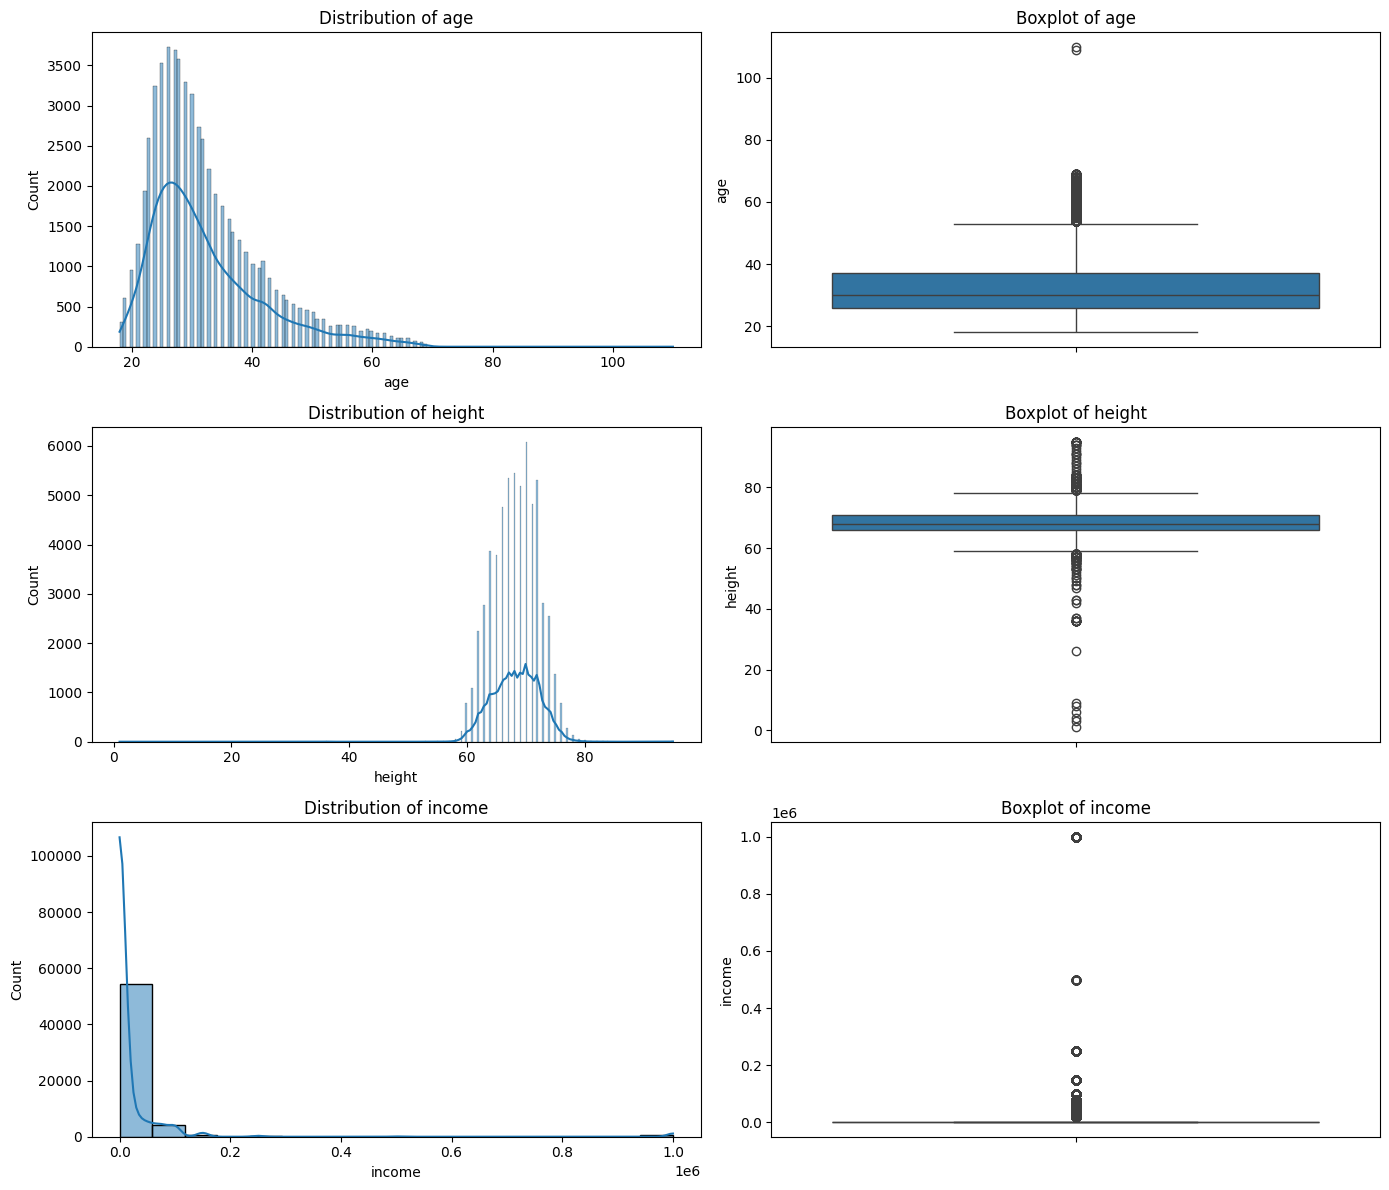

In [4]:
numeric_cols = ['age', 'height', 'income']
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(14, 4*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    if col in df.columns:
        # Histogram
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Distribution of {col}')
        
        # Boxplot
        sns.boxplot(y=df[col].dropna(), ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

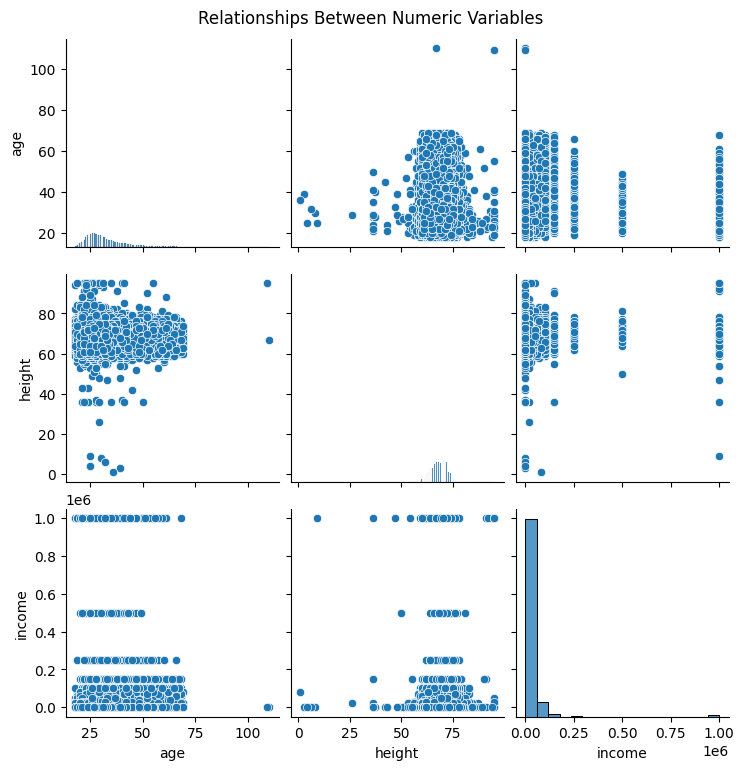

In [5]:
numeric_df = df[numeric_cols].dropna()
sns.pairplot(numeric_df)
plt.suptitle('Relationships Between Numeric Variables', y=1.02)
plt.show()

/tmp/ipykernel_9088/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


<Figure size 1200x1000 with 0 Axes>

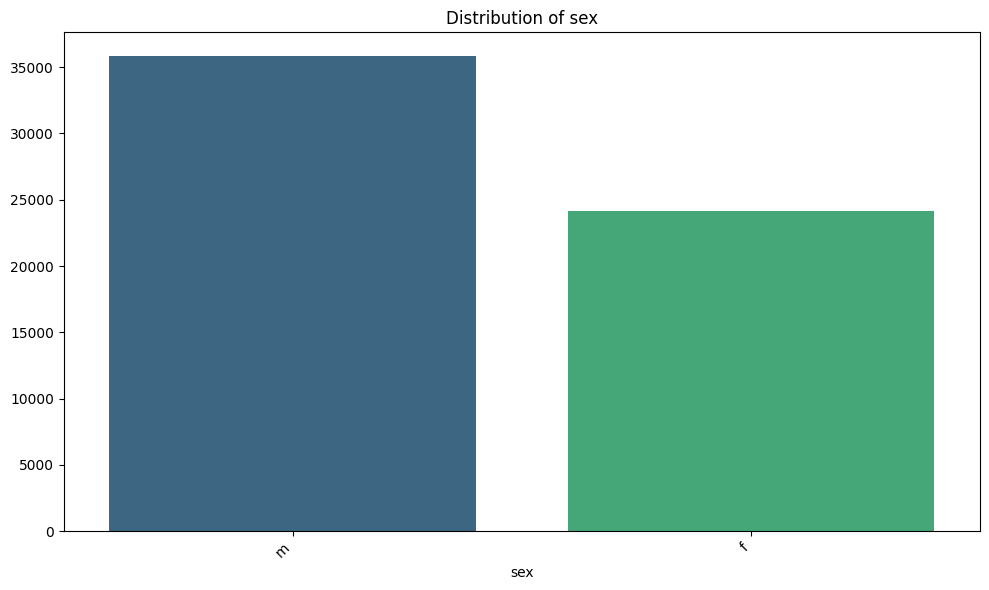

/tmp/ipykernel_9088/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


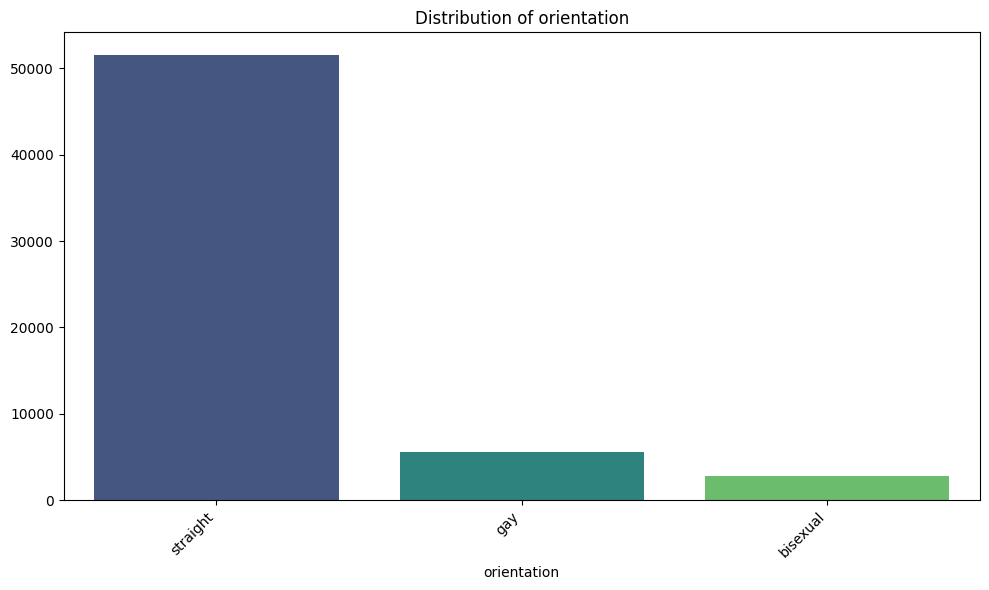

/tmp/ipykernel_9088/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


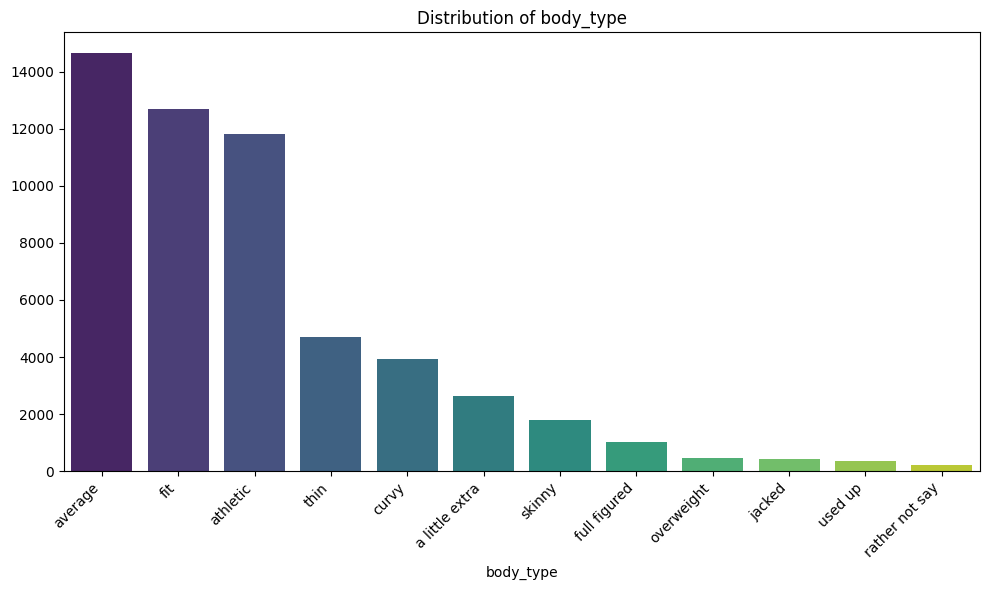

/tmp/ipykernel_9088/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


Skipping diet: too many categories (18)


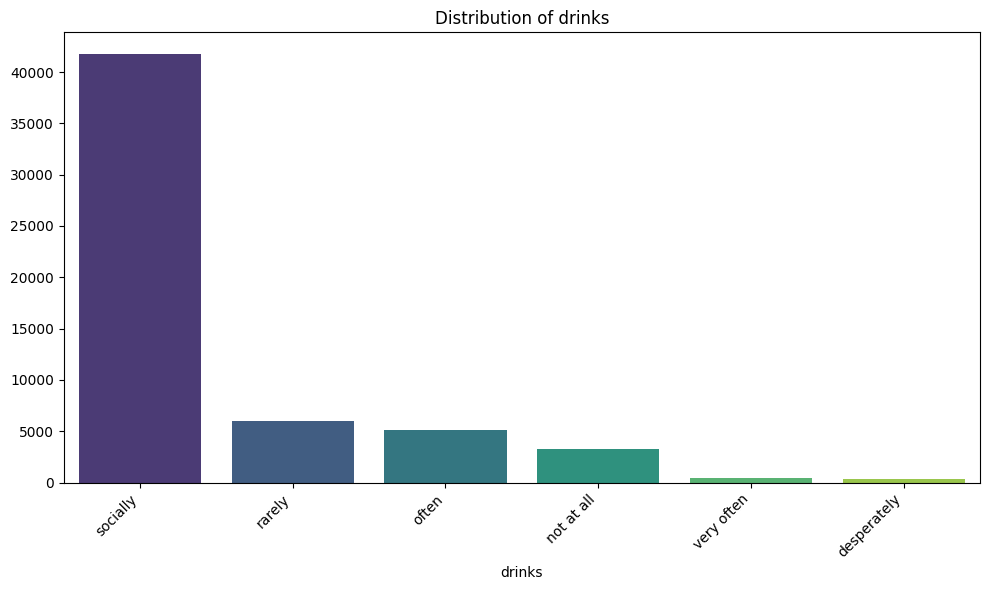

/tmp/ipykernel_9088/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


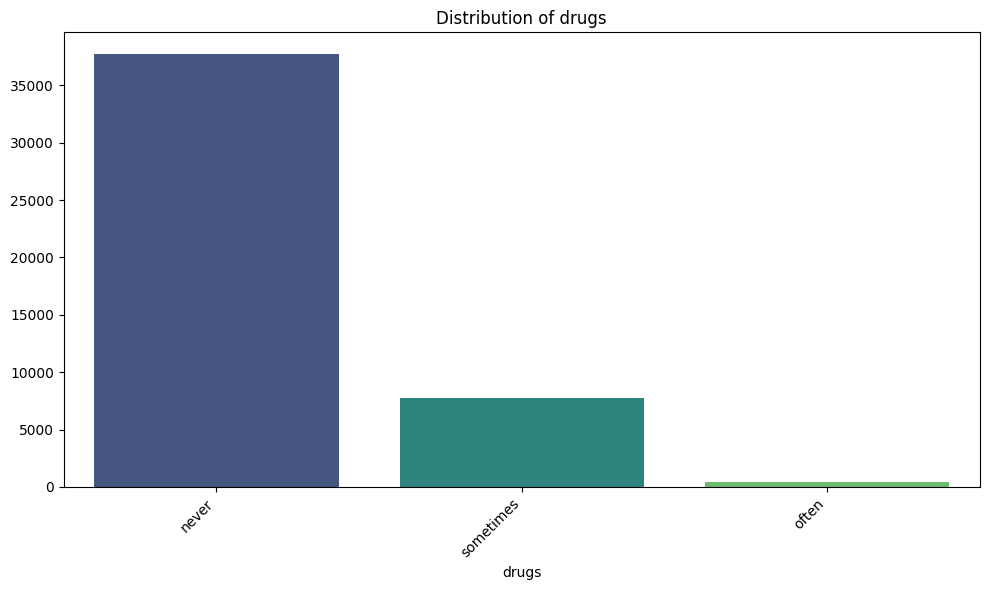

/tmp/ipykernel_9088/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


Skipping education: too many categories (32)
Skipping job: too many categories (21)


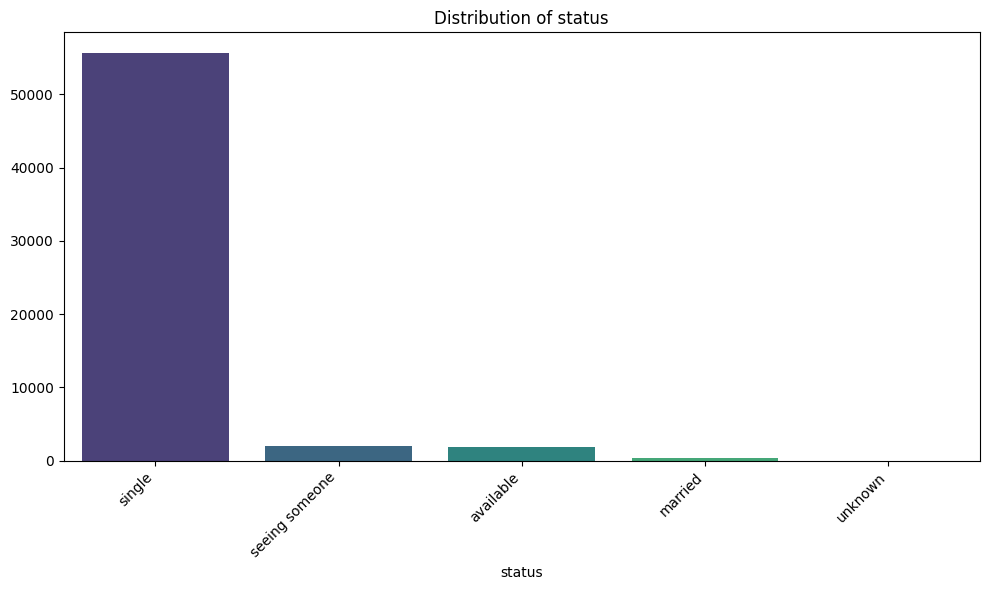

/tmp/ipykernel_9088/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


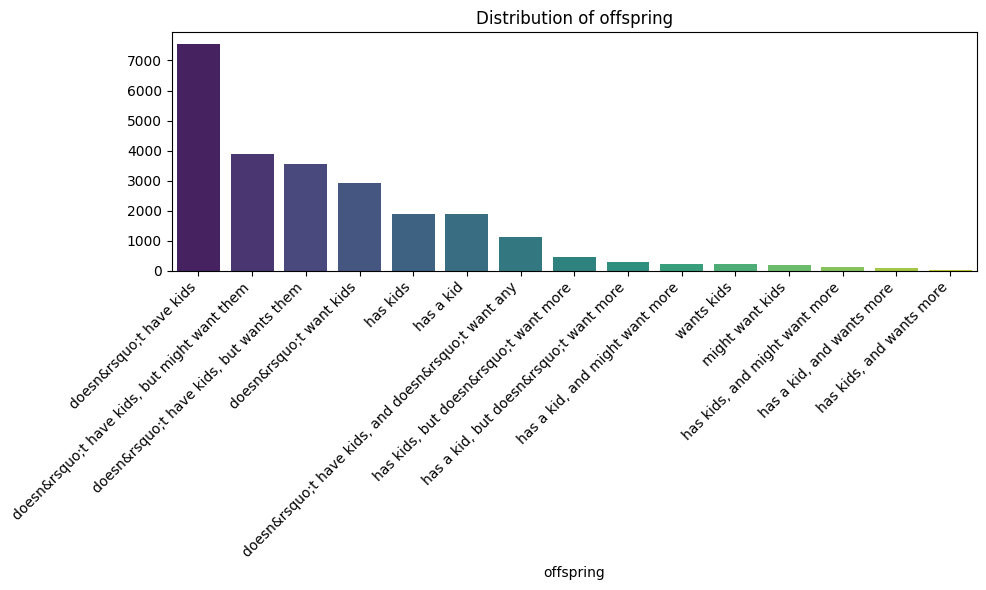

/tmp/ipykernel_9088/376925637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


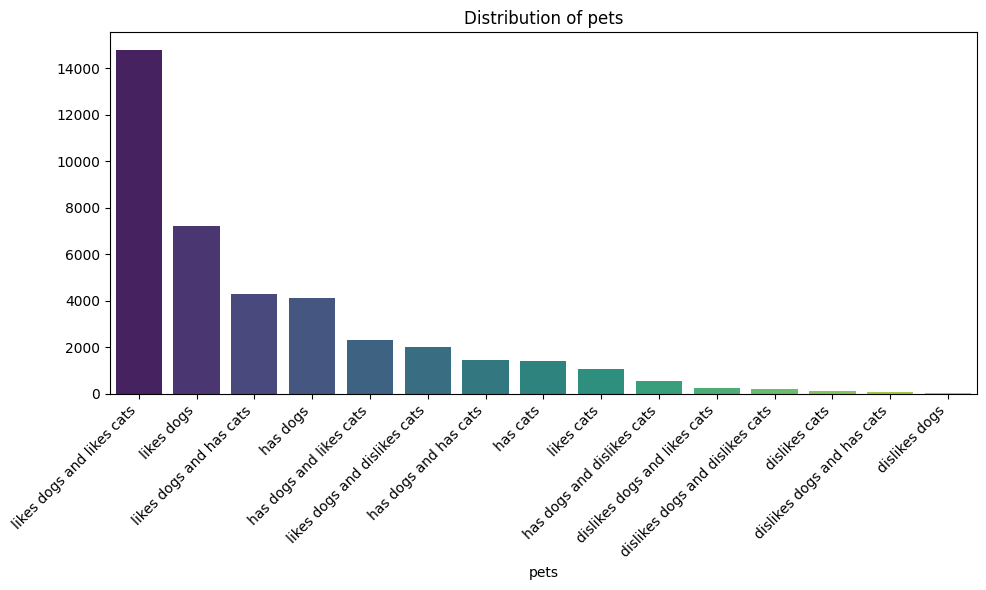

Skipping speaks: too many categories (7647)


In [6]:
categorical_cols = ['sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'status', 'offspring', 'pets', 'speaks']
plt.figure(figsize=(12, 10))

for col in categorical_cols:
    if col in df.columns:
        # Check the number of unique values
        n_unique = df[col].nunique()
        
        if n_unique > 15:  # Too many categories
            print(f"Skipping {col}: too many categories ({n_unique})")
            continue
            
        plt.figure(figsize=(10, 6))
        value_counts = df[col].value_counts().sort_values(ascending=False)
        
        # Plot top categories
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


essay0: 90.8% filled, avg length: 616.8 chars
essay1: 87.4% filled, avg length: 235.3 chars
essay2: 83.9% filled, avg length: 145.6 chars
essay3: 80.9% filled, avg length: 73.7 chars
essay4: 82.4% filled, avg length: 563.1 chars
essay5: 81.9% filled, avg length: 120.8 chars
essay6: 77.0% filled, avg length: 117.2 chars
essay7: 79.2% filled, avg length: 94.3 chars
essay8: 67.9% filled, avg length: 74.7 chars
essay9: 79.0% filled, avg length: 158.6 chars


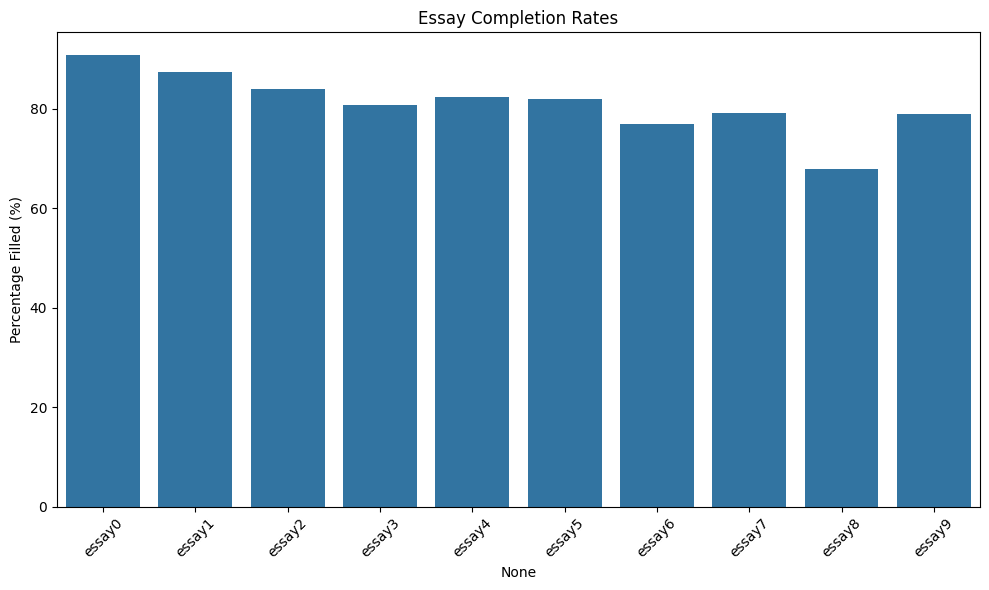

In [7]:
essay_cols = [col for col in df.columns if col.startswith('essay')]
essay_lengths = pd.DataFrame()

for col in essay_cols:
    # Calculate non-null percentage
    non_null_pct = (df[col].notnull().mean() * 100)
    # Calculate average length of text
    df[f'{col}_length'] = df[col].fillna('').astype(str).apply(len)
    
    print(f"{col}: {non_null_pct:.1f}% filled, avg length: {df[f'{col}_length'].mean():.1f} chars")

# Visualize essay completion rates
plt.figure(figsize=(10, 6))
completion_rates = pd.Series({col: df[col].notnull().mean() * 100 for col in essay_cols})
sns.barplot(x=completion_rates.index, y=completion_rates.values)
plt.title('Essay Completion Rates')
plt.ylabel('Percentage Filled (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Function to get coordinates with error handling and rate limiting
def get_coordinates(location_name, geolocator, delay=1):
    """
    Get latitude and longitude for a location with error handling and rate limiting
    """
    try:
        time.sleep(delay)  # Rate limiting
        if pd.isna(location_name) or location_name == '':
            return None, None
        
        location = geolocator.geocode(location_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except (GeocoderTimedOut, GeocoderServiceError):
        return None, None
    

# Create a sample of the data to avoid too many geocoding requests
# In a real project, you'd save these results to avoid repeated API calls
location_sample = df['location'].dropna().sample(n=min(100, len(df['location'].dropna())))

# Initialize geocoder
geolocator = Nominatim(user_agent="okcupid_project")

# Create DataFrame to store coordinates
geo_df = pd.DataFrame(location_sample)
geo_df['latitude'] = None
geo_df['longitude'] = None

# Geocode the locations
print("Geocoding locations (this may take a while due to rate limiting)...")
for idx, row in tqdm(geo_df.iterrows(), total=len(geo_df)):
    lat, lon = get_coordinates(row['location'], geolocator)
    geo_df.at[idx, 'latitude'] = lat
    geo_df.at[idx, 'longitude'] = lon

# Remove rows with failed geocoding
geo_df = geo_df.dropna(subset=['latitude', 'longitude'])

# Display the results
print(f"Successfully geocoded {len(geo_df)} out of {len(location_sample)} locations")
geo_df.head()

# Create a map to visualize the locations
map_center = [geo_df['latitude'].mean(), geo_df['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=4)

# Add a marker cluster to handle many points more efficiently
marker_cluster = MarkerCluster().add_to(mymap)

# Add markers for each location
for idx, row in geo_df.iterrows():
    popup_text = f"Location: {row['location']}"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text
    ).add_to(marker_cluster)

# Display the map
mymap

Geocoding locations (this may take a while due to rate limiting)...


  0%|          | 0/100 [00:00<?, ?it/s]

Successfully geocoded 100 out of 100 locations


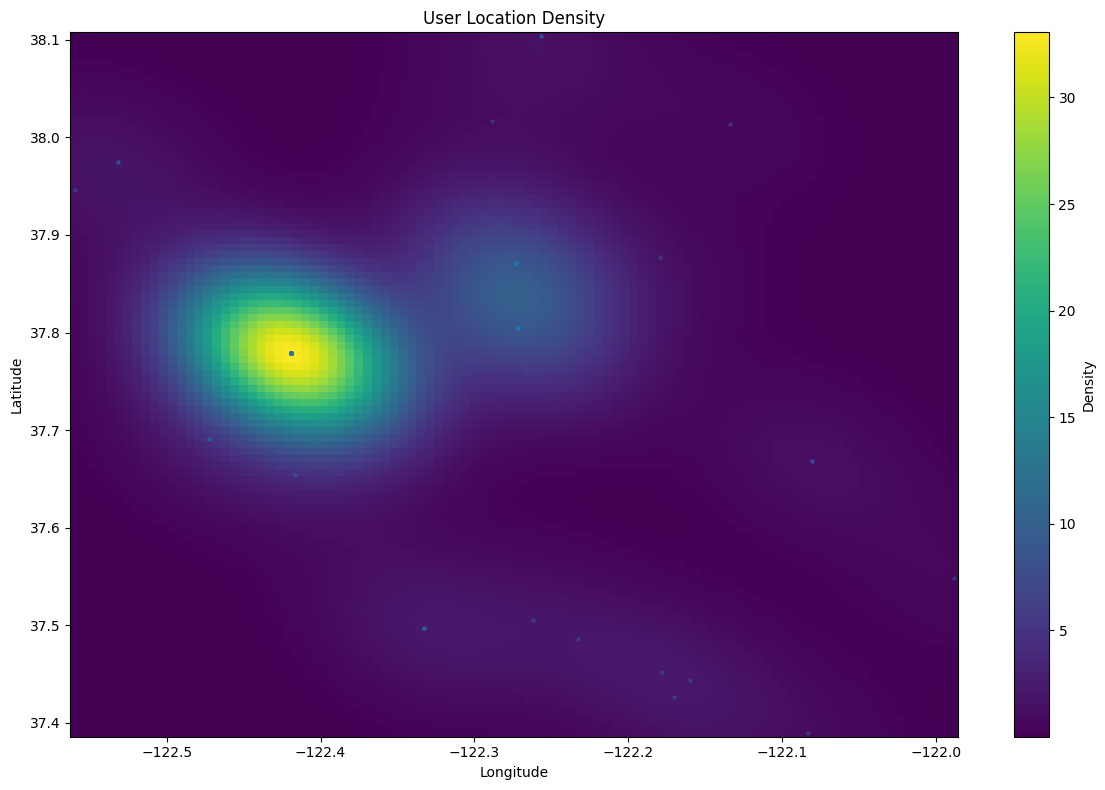

In [9]:
# Calculate location density using kernel density estimation
if len(geo_df) > 5:  # Need sufficient points for meaningful KDE
    
    # Ensure longitude and latitude are numeric
    geo_df['longitude'] = pd.to_numeric(geo_df['longitude'], errors='coerce')
    geo_df['latitude'] = pd.to_numeric(geo_df['latitude'], errors='coerce')
    
    # Drop rows with NaN values after conversion
    geo_df = geo_df.dropna(subset=['longitude', 'latitude'])
    
    # Create a KDE of the locations
    x = geo_df['longitude']
    y = geo_df['latitude']
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot the KDE
    plt.figure(figsize=(12, 8))
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='viridis')
    plt.colorbar(label='Density')
    plt.scatter(x, y, s=5, alpha=0.3)
    plt.title('User Location Density')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

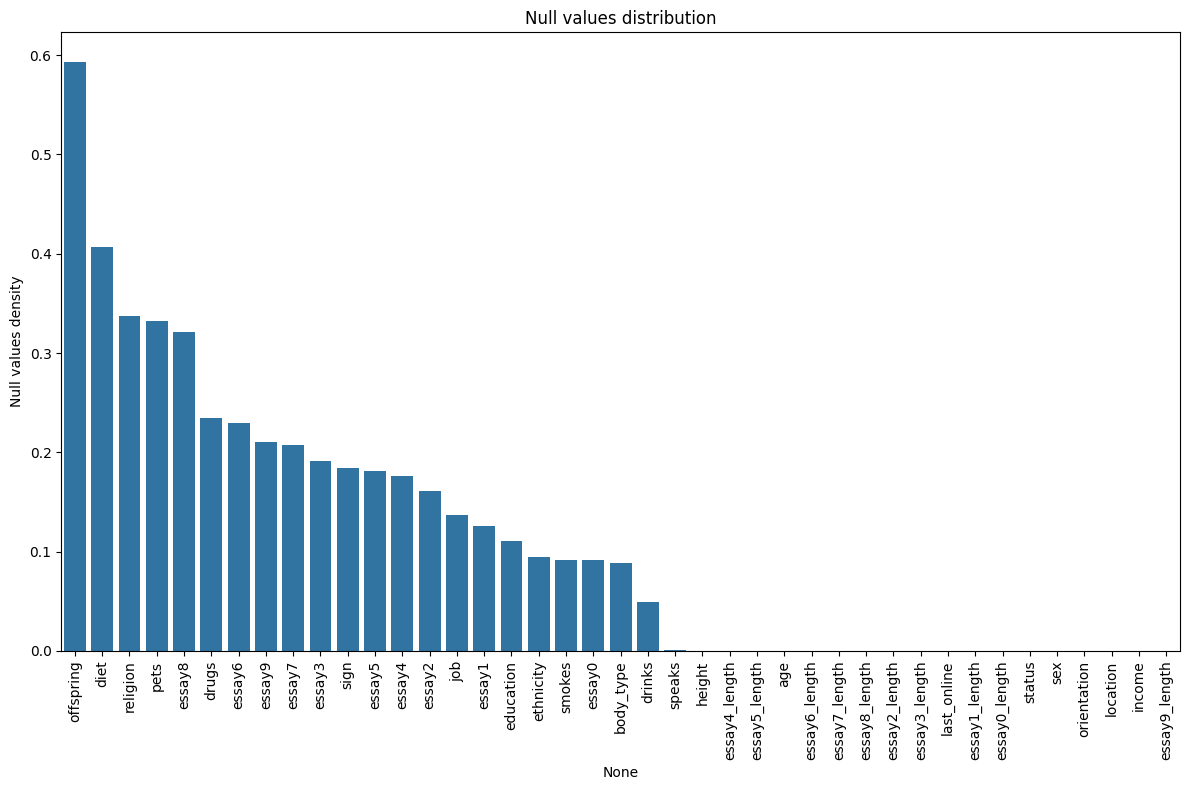

In [10]:
# Data Cleaning Strategy
# Calculate percentage of null values in each column
missing_data = df.isnull().mean().sort_values(ascending=False)

# Plot the missing data percentages
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=90)
plt.ylabel('Null values density')
plt.title('Null values distribution')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

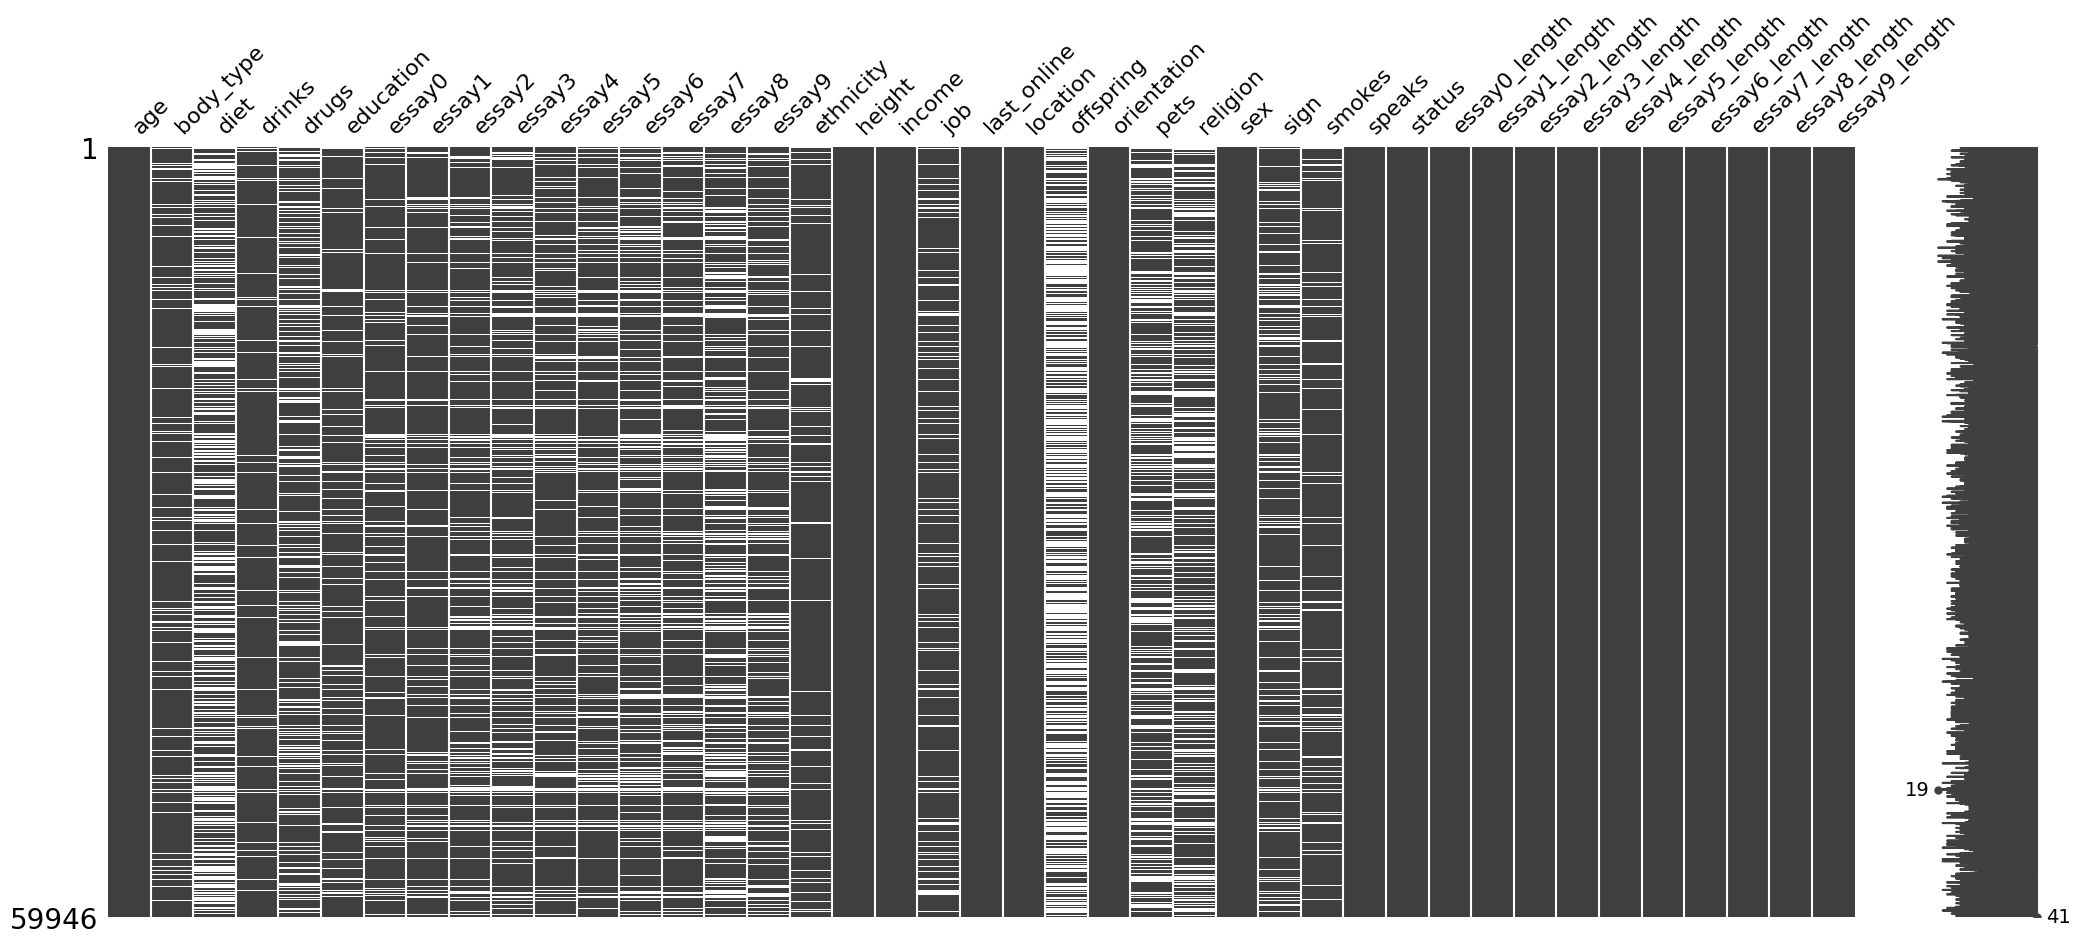

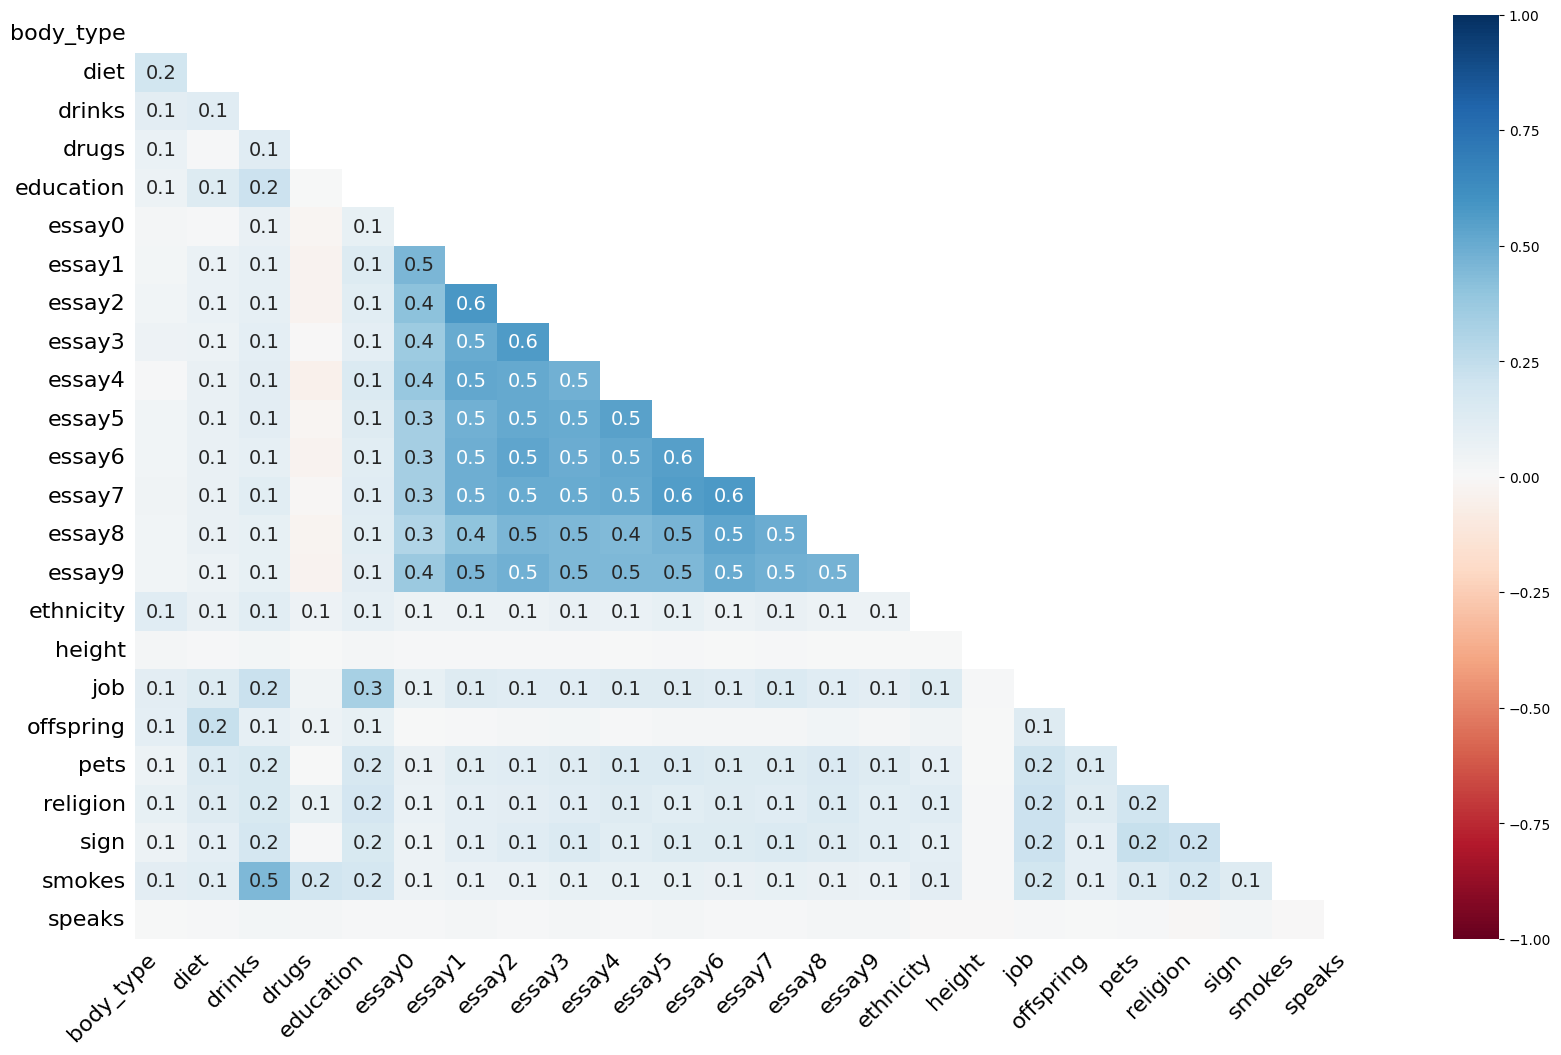

In [11]:

plt.figure()
msno.matrix(df)
plt.savefig('missing_values2.png')
msno.heatmap(df)
plt.savefig('missing_values.png')
plt.show()

Missing Data Summary:
               missing_count  missing_percent
offspring              35561        59.321723
diet                   24395        40.694959
religion               20226        33.740366
pets                   19921        33.231575
essay8                 19225        32.070530
drugs                  14080        23.487806
essay6                 13771        22.972342
essay9                 12603        21.023922
essay7                 12451        20.770360
essay3                 11476        19.143896
sign                   11056        18.443266
essay5                 10850        18.099623
essay4                 10537        17.577486
essay2                  9638        16.077803
job                     8198        13.675641
essay1                  7572        12.631368
education               6628        11.056618
ethnicity               5680         9.475194
smokes                  5512         9.194942
essay0                  5488         9.154906
body_type   

<Figure size 1200x800 with 0 Axes>

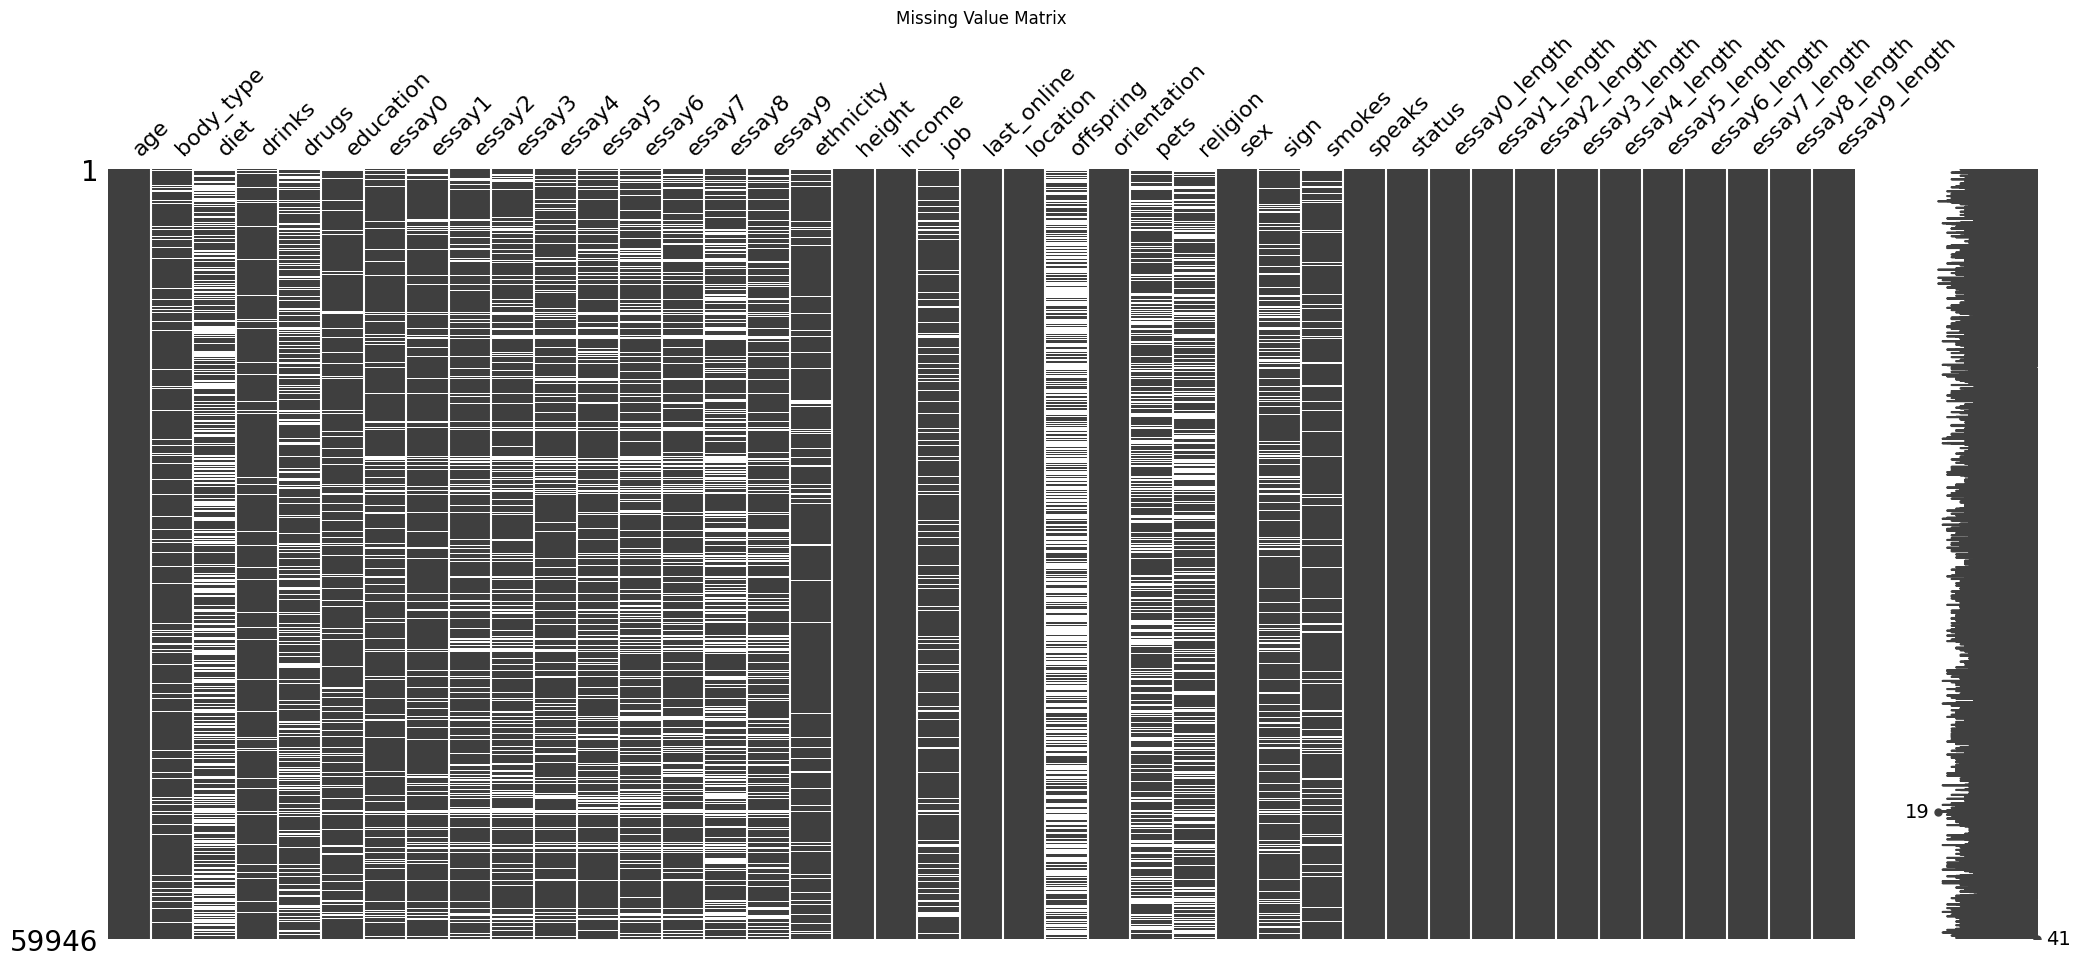


Testing for MCAR patterns:
Performed 299 tests of MCAR pattern
Found 277 significant relationships between missingness and values
Proportion significant: 92.64%

Top relationships between missingness and values (challenging MCAR assumption):
    missing_col      value_col  t_statistic  p_value  significant
154      essay6  essay8_length   -54.625629      0.0         True
114      essay3  essay7_length   -71.726796      0.0         True
115      essay3  essay8_length   -45.774442      0.0         True
116      essay3  essay9_length   -56.088164      0.0         True
190      essay9  essay5_length   -55.550651      0.0         True
120      essay4  essay0_length   -50.178496      0.0         True
121      essay4  essay1_length   -81.651044      0.0         True
122      essay4  essay2_length   -87.811525      0.0         True
113      essay3  essay6_length   -49.384342      0.0         True
123      essay4  essay3_length   -68.897825      0.0         True

Likelihood data is MCAR: 7.36%

In [12]:
def check_mar_correlations(df):
    """Check correlations between values and missingness indicators"""
    # Select only numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Create binary indicators for missingness
    missing_indicators = df.isna().astype(int)
    
    # Add '_missing' suffix to column names
    missing_indicators.columns = [f"{col}_missing" for col in df.columns]
    
    # Combine numeric data with missing indicators
    combined = pd.concat([numeric_df, missing_indicators], axis=1)
    
    # Calculate correlations
    corr_matrix = combined.corr()
    
    # Find significant correlations between missingness and values
    significant_correlations = []
    
    for col in numeric_df.columns:
        for miss_col in missing_indicators.columns:
            if col != miss_col.replace('_missing', ''):  # Don't compare a column with its own missingness
                if col in corr_matrix.index and miss_col in corr_matrix.columns:
                    corr_value = corr_matrix.loc[col, miss_col]
                    if not np.isnan(corr_value) and abs(corr_value) > 0.3:  # Threshold for meaningful correlation
                        significant_correlations.append({
                            'value_column': col,
                            'missing_column': miss_col,
                            'correlation': corr_value
                        })
    
    return pd.DataFrame(significant_correlations).sort_values('correlation', ascending=False)

def logistic_regression_test(df, target_column):
    """Test if missingness in target_column can be predicted by other variables"""
    
    # Skip if column has no missing values
    if df[target_column].isna().sum() == 0:
        return {'is_predictable': False, 'message': 'No missing values in column'}
    
    # Create a binary indicator for missingness in the target column
    missing_indicator = df[target_column].isna().astype(int)
    
    # Create features from other columns, imputing missing values
    features = df.drop(columns=[target_column])
    
    # Skip if no features available
    if features.shape[1] == 0:
        return {'is_predictable': False, 'message': 'No features available'}
    
    # Impute missing values in features
    imputer = SimpleImputer(strategy='median')
    try:
        features_imputed = pd.DataFrame(
            imputer.fit_transform(features),
            columns=features.columns
        )
    except:
        return {'is_predictable': False, 'message': 'Failed to impute values'}
    
    # Fit logistic regression
    model = LogisticRegression(max_iter=1000, solver='liblinear')
    try:
        model.fit(features_imputed, missing_indicator)
        
        # Calculate scores
        score = model.score(features_imputed, missing_indicator)
        
        # Get feature importances
        coefficients = pd.DataFrame({
            'feature': features.columns,
            'coefficient': model.coef_[0]
        }).sort_values('coefficient', ascending=False)
        
        return {
            'score': score,
            'coefficients': coefficients,
            'is_predictable': score > 0.7,  # Threshold suggesting MAR
            'message': f'Model score: {score:.3f}'
        }
    except Exception as e:
        return {'is_predictable': False, 'message': f'Model fitting failed: {str(e)}'}

def manual_mcar_test(df):
    """
    Manual implementation to test MCAR hypothesis
    This checks if missingness in one variable is related to values in other variables
    """
    # Create missingness indicators
    missing_indicators = df.isna().astype(int)
    
    # Only test numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # For each pair of columns, test if missingness in one is related to values in another
    results = []
    
    for col1 in df.columns:
        # Only test columns with sufficient missing values
        if missing_indicators[col1].sum() < 10 or missing_indicators[col1].sum() > len(df) - 10:
            continue
            
        for col2 in numeric_cols:
            if col1 != col2:
                # Split data based on whether col1 is missing
                missing_in_col1 = missing_indicators[col1] == 1
                present_in_col1 = ~missing_in_col1
                
                # Get values of col2 where col1 is missing vs present
                values_when_col1_missing = df.loc[missing_in_col1, col2].dropna()
                values_when_col1_present = df.loc[present_in_col1, col2].dropna()
                
                # If enough data to compare
                if len(values_when_col1_missing) > 5 and len(values_when_col1_present) > 5:
                    try:
                        # t-test to see if the distributions differ
                        t_stat, p_val = stats.ttest_ind(
                            values_when_col1_missing,
                            values_when_col1_present,
                            equal_var=False  # Welch's t-test
                        )
                        
                        results.append({
                            'missing_col': col1,
                            'value_col': col2,
                            't_statistic': t_stat,
                            'p_value': p_val,
                            'significant': p_val < 0.05
                        })
                    except:
                        pass  # Skip if test fails
    
    result_df = pd.DataFrame(results)
    
    # If we have results, summarize them
    if len(result_df) > 0:
        significant_tests = result_df[result_df['significant'] == True]
        
        print(f"Performed {len(result_df)} tests of MCAR pattern")
        print(f"Found {len(significant_tests)} significant relationships between missingness and values")
        
        if len(result_df) > 0:
            print(f"Proportion significant: {len(significant_tests) / len(result_df):.2%}")
        
        if len(significant_tests) > 0:
            print("\nTop relationships between missingness and values (challenging MCAR assumption):")
            print(significant_tests.sort_values('p_value').head(10))
            
            mcar_likelihood = 1 - (len(significant_tests) / len(result_df))
            print(f"\nLikelihood data is MCAR: {mcar_likelihood:.2%}")
            
            if mcar_likelihood > 0.95:
                print("Data appears to be MCAR (Missing Completely At Random)")
            elif mcar_likelihood > 0.8:
                print("Data may be MCAR, but there are some patterns challenging this assumption")
            else:
                print("Data is likely not MCAR - could be MAR or MNAR")
        else:
            print("No significant relationships found. Data may be MCAR.")
            
        return result_df
    else:
        print("Could not perform enough tests to determine MCAR pattern")
        return None

def missing_pattern_by_features(df, column_of_interest=None):
    """
    Examine if missing values are related to specific features
    If column_of_interest is provided, focuses on that column's missingness
    """
    if column_of_interest is None:
        # Count missing values per row
        missingness = df.isna().sum(axis=1)
        plt.figure(figsize=(10, 6))
        plt.hist(missingness, bins=30)
        plt.title('Missing Values Per Row')
        plt.xlabel('Number of Missing Values')
        plt.ylabel('Count of Rows')
        plt.show()
    else:
        # Focus on specified column's missingness
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        numeric_cols = [col for col in numeric_cols if col != column_of_interest]
        
        # Only proceed if we have numeric columns to analyze
        if not numeric_cols:
            print("No numeric columns available for analysis")
            return
            
        # Create indicator for missingness
        missing_indicator = df[column_of_interest].isna()
        
        # Test for differences in other columns based on missingness
        for col in numeric_cols[:5]:  # Limit to 5 columns for brevity
            plt.figure(figsize=(8, 6))
            sns.histplot(
                data=df, x=col, hue=missing_indicator,
                element="step", common_norm=False, stat="density",
                bins=20
            )
            plt.title(f'Distribution of {col} by {column_of_interest} Missingness')
            plt.show()
            
            # Calculate means
            mean_when_missing = df.loc[missing_indicator, col].mean()
            mean_when_present = df.loc[~missing_indicator, col].mean()
            print(f"Mean of {col} when {column_of_interest} is missing: {mean_when_missing:.2f}")
            print(f"Mean of {col} when {column_of_interest} is present: {mean_when_present:.2f}")
            
            # T-test
            try:
                t_stat, p_val = stats.ttest_ind(
                    df.loc[missing_indicator, col].dropna(),
                    df.loc[~missing_indicator, col].dropna()
                )
                print(f"T-test p-value: {p_val:.4f} {'(significant)' if p_val < 0.05 else ''}\n")
            except:
                print("Could not perform t-test\n")

def analyze_missing_patterns(df):
    """Run a comprehensive analysis of missing data patterns"""
    
    # Basic missing data summary
    missing_summary = pd.DataFrame({
        'missing_count': df.isna().sum(),
        'missing_percent': df.isna().sum() / len(df) * 100
    }).sort_values('missing_percent', ascending=False)
    
    print("Missing Data Summary:")
    print(missing_summary)
    
    # Visualize missing patterns
    try:
        import missingno as msno
        plt.figure(figsize=(12, 8))
        msno.matrix(df)
        plt.title('Missing Value Matrix')
        plt.show()
    except:
        print("Could not import missingno. Skipping visualization.")
    
    # Test for MCAR patterns
    print("\nTesting for MCAR patterns:")
    mcar_results = manual_mcar_test(df)
    
    # Check for MAR through correlations
    print("\nChecking for MAR through correlations:")
    mar_correlations = check_mar_correlations(df)
    if len(mar_correlations) > 0:
        print("Found significant correlations between values and missingness:")
        print(mar_correlations.head(10))  # Show top 10
        print("This suggests data may be MAR (Missing At Random)")
    else:
        print("No significant correlations found between values and missingness patterns")
    
    # For columns with substantial missing data, try logistic regression
    columns_to_test = missing_summary[missing_summary['missing_percent'] > 10].index.tolist()
    
    mar_evidence = []
    print("\nTesting if missingness can be predicted (MAR check):")
    for col in columns_to_test[:5]:  # Limit to first 5 columns with significant missingness
        print(f"Testing column: {col}")
        result = logistic_regression_test(df, col)
        print(f"  Result: {result.get('message', '')}")
        if result.get('is_predictable', False):
            print(f"  ✓ Missingness in '{col}' appears to be MAR - predictable from other variables")
            mar_evidence.append(col)
        else:
            print(f"  ✗ Missingness in '{col}' is not strongly predictable from other variables")
    
    # Summary
    print("\nSUMMARY:")
    if mar_evidence:
        print(f"- Found evidence of MAR in columns: {', '.join(mar_evidence)}")
    

analyze_missing_patterns(df)

### Missing Values Analysis
By analyzing the missing values in datataframe and performing hypotesis test, we have significant evidences that missing data are MAR especially in essay columns. With this, we can use multiple inputation to complete data.

In [13]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# FOR NUMERICAL VARIABLES
num_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    max_iter=10,
    random_state=42
    # Removed add_indicator=True which was causing the shape mismatch
)

# Create dictionary for column-specific constraints 
bounds = {
    'age': [18, 100],
    'height': [120, 220],  # in cm
    'income': [0, 250000]
}


# Apply the imputation with constraints
df_numeric = pd.DataFrame(
    num_imputer.fit_transform(df[numeric_columns]),
    columns=numeric_columns
)

# Apply bounds to ensure realistic imputed values
for col, (lower, upper) in bounds.items():
    if col in df_numeric.columns:
        df_numeric[col] = np.clip(df_numeric[col], lower, upper)

# FOR CATEGORICAL COLUMNS
essay_columns = [col for col in categorical_columns if col.startswith('essay')]
standard_cat_columns = [col for col in categorical_columns if not col.startswith('essay')]

# Encode the categorical variables
cat_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoded_cats = pd.DataFrame(
    cat_encoder.fit_transform(df[standard_cat_columns]),
    columns=standard_cat_columns
)

# Use KNN imputation for categorical data (after encoding)
cat_imputer = KNNImputer(n_neighbors=5, weights='distance')
imputed_cats = pd.DataFrame(
    cat_imputer.fit_transform(encoded_cats),
    columns=standard_cat_columns
)

df_categorical = pd.DataFrame(
    cat_encoder.inverse_transform(imputed_cats),
    columns=standard_cat_columns
)

# For essays, use a specialized approach
for col in essay_columns:
    # Leave truly empty essays as empty strings
    df_categorical[col] = df[col].fillna("")
    
    # prompt_texts = {"essay0": "About me:", "essay1": "What I'm doing with my life:", ...}
    # df_categorical[col] = df[col].fillna(prompt_texts.get(col, "No information provided"))

df_categorical = pd.concat([df_categorical, df[essay_columns].fillna("")], axis=1)

# Recombine the datasets
df_imputed = pd.concat([df_numeric, df_categorical], axis=1)

In [14]:
print(df_imputed.isnull().sum())

age              0
height           0
income           0
essay0_length    0
essay1_length    0
essay2_length    0
essay3_length    0
essay4_length    0
essay5_length    0
essay6_length    0
essay7_length    0
essay8_length    0
essay9_length    0
body_type        0
diet             0
drinks           0
drugs            0
education        0
ethnicity        0
job              0
last_online      0
location         0
offspring        0
orientation      0
pets             0
religion         0
sex              0
sign             0
smokes           0
speaks           0
status           0
essay0           0
essay1           0
essay2           0
essay3           0
essay4           0
essay5           0
essay6           0
essay7           0
essay8           0
essay9           0
essay0           0
essay1           0
essay2           0
essay3           0
essay4           0
essay5           0
essay6           0
essay7           0
essay8           0
essay9           0
dtype: int64


In [15]:
# Explore the unique values and their frequencies
for field in ['job', 'education']:
    print(f"\n{field.upper()} - Top 20 most common values:")
    value_counts = df_imputed[field].value_counts()
    print(value_counts.head(20))
    print(f"Total unique values: {len(value_counts)}")


JOB - Top 20 most common values:
job
other                                8320
student                              4886
science / tech / engineering         4862
computer / hardware / software       4859
medicine / health                    4687
sales / marketing / biz dev          4454
artistic / musical / writer          4446
education / academia                 3989
executive / management               3224
entertainment / media                2930
law / legal services                 2391
hospitality / travel                 2384
banking / financial / real estate    2287
construction / craftsmanship         1324
political / government               1177
military                             1094
clerical / administrative             871
rather not say                        722
retired                               400
transportation                        366
Name: count, dtype: int64
Total unique values: 21

EDUCATION - Top 20 most common values:
education
graduated from college

In [16]:
def normalize_text(text):
    """Normalize text by converting to lowercase and removing special characters"""
    if pd.isna(text) or text == '':
        return None
    # Convert to lowercase and remove extra whitespace
    text = str(text).lower().strip()
    # Remove special characters
    text = re.sub(r'[^\w\s]', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    return text

def standardize_job_categories(df):
    """Create standardized job categories from free-text job field"""
    # Create a copy of the original column
    df['job_original'] = df['job']
    df['job_standardized'] = df['job'].apply(normalize_text)
    
    # Create mappings for common job categories
    job_mappings = {
        # Technology
        'software|developer|programmer|engineer.*comput|web developer': 'software_engineer',
        'data.*scien|machine learning|ai|artificial intelligence': 'data_scientist',
        'system.*admin|network|it support|technical support': 'it_support',
        
        # Healthcare
        'doctor|physician|surgeon': 'medical_doctor',
        'nurse|nursing': 'nurse',
        'dentist|dental': 'dentist',
        'therap|psycholog|counsel': 'therapist',
        
        # Education
        'teacher|professor|instructor|lecturer': 'educator',
        'student': 'student',
        'researcher|scientist(?!.*data)': 'researcher',
        
        # Business
        'manag(?!.*project)|director|executive|ceo|cfo|coo': 'management',
        'sales|marketing': 'sales_marketing',
        'consult': 'consultant',
        'financ|accountant|bookkeep': 'finance',
        
        # Creative
        'design|graphic|artist|architect': 'designer_artist',
        'writer|editor|journalist': 'writer',
        'photograph': 'photographer',
        'music|musician': 'musician',
        
        # Service
        'retail|cashier|clerk|barista': 'retail',
        'chef|cook|baker|restaurant': 'food_service',
        'bartend|server|waiter|waitress': 'hospitality',
        
        # Other
        'unemployed|between jobs': 'unemployed',
        'self.*employed|entrepreneur|freelance': 'self_employed',
        'retired': 'retired',
        'rather not say|private|secret': 'undisclosed'
    }
    
    # Apply mappings
    standardized = df['job_standardized'].copy()
    for pattern, category in job_mappings.items():
        mask = standardized.str.contains(pattern, case=False, na=False, regex=True)
        standardized.loc[mask] = category
    
    # If any job wasn't matched by the patterns, keep it as 'other'
    standardized.fillna('other', inplace=True)
    
    # Update the dataframe
    df['job_category'] = standardized
    
    return df

def standardize_education_categories(df):
    """Create standardized education categories from free-text education field"""
    # Create a copy of the original column
    df['education_original'] = df['education']
    df['education_standardized'] = df['education'].apply(normalize_text)
    
    # Create mappings for education levels
    education_mappings = {
        'high school|secondary|ged': 'high_school',
        'college|university|undergrad|bachelor|associate': 'bachelors',
        'master|graduate|mba|ms |ma ': 'masters',
        'phd|doctorate|doctor|jd|md ': 'doctorate',
        'dropped out|some college|some university': 'some_college',
        'trade|vocational|technical': 'vocational',
        'school of hard knocks|university of life': 'alternative',
        'space camp': 'alternative',
        'med school|medical school': 'medical_school',
        'law school': 'law_school'
    }
    
    # Apply mappings
    standardized = df['education_standardized'].copy()
    for pattern, category in education_mappings.items():
        mask = standardized.str.contains(pattern, case=False, na=False, regex=True)
        standardized.loc[mask] = category
    
    # If any education wasn't matched by the patterns, mark as 'other'
    standardized.fillna('other', inplace=True)
    
    # Update the dataframe
    df['education_level'] = standardized
    
    return df

Job Categories Distribution:
job_category
other                         8320
student                       4886
science tech engineering      4862
software_engineer             4859
medicine health               4687
sales_marketing               4454
designer_artist               4446
education academia            3989
management                    3224
researcher                    2930
law legal services            2391
hospitality travel            2384
finance                       2287
construction craftsmanship    1324
political government          1177
military                      1094
clerical administrative        871
undisclosed                    722
retired                        400
transportation                 366
unemployed                     273
Name: count, dtype: int64

Education Level Distribution:
education_level
bachelors                  36063
masters                    17729
high_school                 2835
working on ph d program      983
some_college      

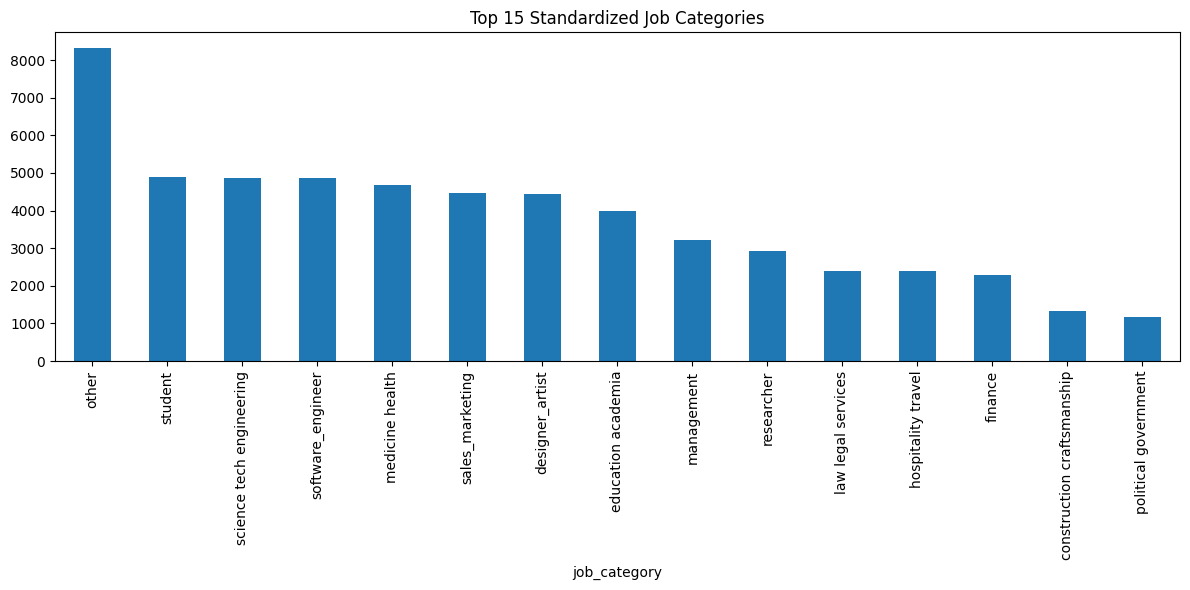

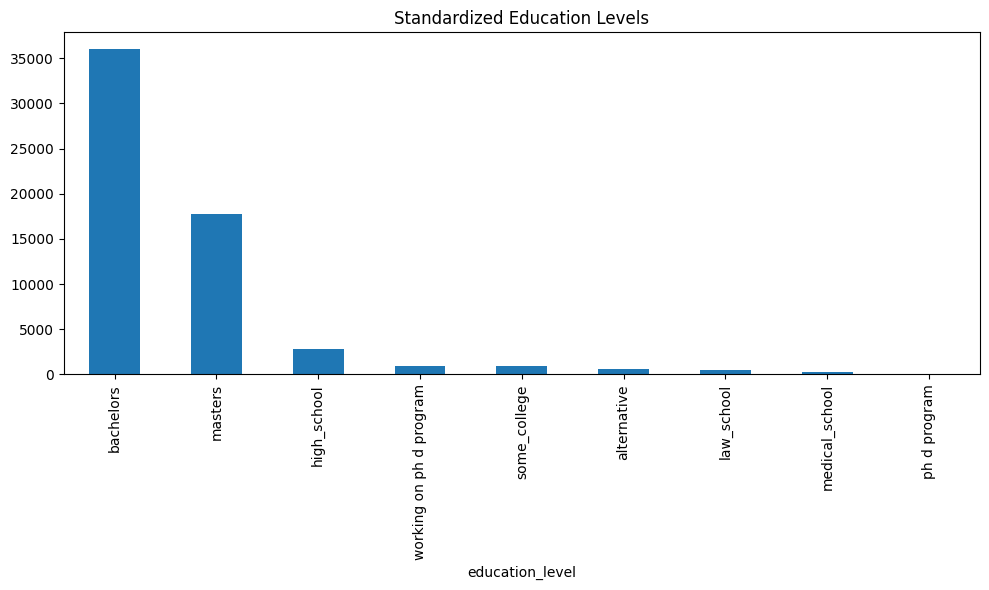

In [17]:
# Apply both standardization functions
df_imputed = standardize_job_categories(df_imputed)
df_imputed = standardize_education_categories(df_imputed)

# Verify the results
print("Job Categories Distribution:")
print(df_imputed['job_category'].value_counts())

print("\nEducation Level Distribution:")
print(df_imputed['education_level'].value_counts())

# Plot the distributions
plt.figure(figsize=(12, 6))
df_imputed['job_category'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Standardized Job Categories')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
df_imputed['education_level'].value_counts().plot(kind='bar')
plt.title('Standardized Education Levels')
plt.tight_layout()
plt.show()

In [18]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/olavo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/olavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/olavo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
def preprocess_essays(df, essay_cols=None):
    """
    Preprocess essay text data and extract features
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing essay columns
    essay_cols : list, optional
        List of essay column names to process
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with additional essay features
    """
    processed_df = df.copy()

    if essay_cols is None:
        essay_cols = [col for col in df.columns if col.startswith('essay') and not col.endswith('_length')]

    # Initialize NLTK resources once
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    def clean_essay(text):
        if not isinstance(text, str) or text.strip() == '':
            return ''
        
        try:
            # Use more robust HTML parsing with error handling
            text = BeautifulSoup(text, 'html.parser').get_text()
        except Exception as e:
            # Just keep going if BeautifulSoup fails
            print(f"BeautifulSoup error: {e}")
        
        # Clean text
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        text = re.sub(r'[^\w\s.,!?]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    # Process each essay column
    for col in essay_cols:
        print(f"Processing {col}...")
        
        # Clean text
        processed_df[f'{col}_clean'] = processed_df[col].apply(clean_essay)
        
        # Initialize feature lists
        word_counts, sentence_counts, avg_word_lengths = [], [], []
        flesch_scores, lemmatized_texts, token_lists = [], [], []
        
        # Process each essay
        for text in processed_df[f'{col}_clean']:
            if not isinstance(text, str) or text.strip() == '':
                # Handle empty or invalid text
                word_counts.append(0)
                sentence_counts.append(0)
                avg_word_lengths.append(0)
                flesch_scores.append(0)
                lemmatized_texts.append('')
                token_lists.append([])
                continue
                
            # Tokenize and analyze
            tokens = word_tokenize(text.lower())
            filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
            sentences = sent_tokenize(text)
            
            # Calculate metrics
            word_count = len(tokens)
            sentence_count = len(sentences)
            avg_word_length = sum(len(word) for word in tokens) / max(1, word_count)
            
            # Calculate readability with error handling
            try:
                flesch_score = textstat.flesch_reading_ease(text)
            except Exception:
                flesch_score = 0
                
            # Append to feature lists
            word_counts.append(word_count)
            sentence_counts.append(sentence_count)
            avg_word_lengths.append(avg_word_length)
            flesch_scores.append(flesch_score)
            lemmatized_texts.append(' '.join(filtered_tokens))
            token_lists.append(filtered_tokens)
            
        # Add features to dataframe
        processed_df[f'{col}_word_count'] = word_counts
        processed_df[f'{col}_sentence_count'] = sentence_counts
        processed_df[f'{col}_avg_word_length'] = avg_word_lengths
        processed_df[f'{col}_flesch_reading_ease'] = flesch_scores
        processed_df[f'{col}_lemmatized'] = lemmatized_texts
        processed_df[f'{col}_tokens'] = token_lists
    
    # Calculate aggregate metrics
    processed_df['total_essay_word_count'] = processed_df[[f'{col}_word_count' for col in essay_cols]].sum(axis=1)
    processed_df['avg_essay_reading_ease'] = processed_df[[f'{col}_flesch_reading_ease' for col in essay_cols]].mean(axis=1)
    
    # Calculate essay completion metrics
    completed_essays = (processed_df[[f'{col}_word_count' for col in essay_cols]] > 0).sum(axis=1)
    processed_df['essay_completion_count'] = completed_essays
    processed_df['essay_completion_rate'] = completed_essays / len(essay_cols)
    
    return processed_df

In [20]:
def extract_topics_and_entities(df, essay_cols=None, max_rows=None):
    """
    Extract topics and named entities from preprocessed essays
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with preprocessed essays
    essay_cols : list, optional
        List of essay column names to process
    max_rows : int, optional
        Maximum number of rows to process (for debugging)
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with additional topic and entity features
    """
    # If essay columns not specified, find all columns starting with 'essay'
    if essay_cols is None:
        essay_cols = [col for col in df.columns if col.startswith('essay') and not col.endswith(('_clean', '_lemmatized', '_tokens'))]
    
    result_df = df.copy()
    
    # Limit rows for debugging if specified
    if max_rows is not None:
        result_df = result_df.head(max_rows)
    
    # Common topics in dating profiles
    topic_keywords = {
        'travel': ['travel', 'journey', 'trip', 'adventure', 'abroad', 'backpack', 'explore', 'wander', 'vacation', 'destination'],
        'food': ['food', 'eat', 'restaurant', 'cook', 'cuisine', 'recipe', 'dinner', 'lunch', 'breakfast', 'meal', 'chef', 'bake'],
        'fitness': ['gym', 'workout', 'exercise', 'fit', 'run', 'yoga', 'hike', 'climb', 'swim', 'bike', 'marathon', 'training'],
        'music': ['music', 'band', 'concert', 'song', 'album', 'play', 'guitar', 'piano', 'singing', 'singer'],
        'movies': ['movie', 'film', 'cinema', 'theater', 'actress', 'actor', 'director', 'watch', 'hollywood', 'show', 'series'],
        'books': ['book', 'read', 'author', 'novel', 'story', 'literature', 'fiction', 'nonfiction', 'chapter', 'library'],
        'art': ['art', 'paint', 'draw', 'artist', 'museum', 'gallery', 'creative', 'design', 'photography'],
        'technology': ['tech', 'computer', 'software', 'hardware', 'programming', 'code', 'developer', 'internet', 'digital', 'startup'],
        'family': ['family', 'parent', 'child', 'kid', 'mom', 'dad', 'mother', 'father', 'sister', 'brother', 'sibling'],
        'education': ['school', 'college', 'university', 'degree', 'student', 'learn', 'study', 'class', 'education', 'academic']
    }
    
    # Process each essay to identify topics
    for col in essay_cols:
        clean_col = f'{col}_clean'
        if clean_col not in result_df.columns:
            print(f"Warning: {clean_col} not found. Run preprocess_essays first.")
            continue
        
        # Identify topics - more efficient approach
        for topic, keywords in topic_keywords.items():
            # Create a set of keywords for faster lookup
            keyword_set = set(keywords)
            result_df[f'{col}_{topic}_score'] = result_df[clean_col].apply(
                lambda x: sum(word in keyword_set for word in x.lower().split()) if isinstance(x, str) and x else 0
            )
    
    # Create aggregate topic scores
    for topic in topic_keywords.keys():
        topic_cols = [col for col in result_df.columns if col.endswith(f'_{topic}_score')]
        if topic_cols:
            result_df[f'total_{topic}_score'] = result_df[topic_cols].sum(axis=1)
    
    return result_df

# Main execution function with progress tracking and error handling
def process_essay_data(df, essay_cols=None, max_rows=None, skip_entity_extraction=True):
    """
    Process essay data with progress tracking and error handling
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing essay columns
    essay_cols : list, optional
        List of essay column names to process
    max_rows : int, optional
        Maximum number of rows to process (for debugging)
    skip_entity_extraction : bool, default=True
        Whether to skip the entity extraction (which can be slow)
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with additional essay features
    """
    try:
        # Download all necessary NLTK resources at once
        resources = ['punkt', 'stopwords', 'wordnet']
        if not skip_entity_extraction:
            resources.extend(['averaged_perceptron_tagger', 'maxent_ne_chunker', 'words'])
            
        for resource in resources:
            try:
                nltk.download(resource, quiet=True)
            except Exception as e:
                print(f"Error downloading {resource}: {e}")
        
        print("NLTK resources downloaded successfully")
        
        # Process essay columns - ensure we have no duplicates
        if essay_cols is None:
            essay_cols = [col for col in df.columns if col.startswith('essay') and not col.endswith(('_length', '_clean', '_lemmatized', '_tokens'))]
        
        print(f"Processing {len(essay_cols)} essay columns")
        
        # Remove duplicates from dataframe if any exist
        df = df.loc[:, ~df.columns.duplicated()]
        
        # Limit rows for debugging if specified
        if max_rows is not None:
            df = df.head(max_rows)
            print(f"Limited to {max_rows} rows for testing")
        
        # Apply text preprocessing pipeline
        print("Starting essay preprocessing...")
        df_processed = preprocess_essays(df, essay_cols)
        print("Essay preprocessing completed")
        
        # Extract topics (and entities if not skipped)
        print("Starting topic extraction...")
        df_processed = extract_topics_and_entities(df_processed, essay_cols, max_rows)
        print("Topic extraction completed")
        
        # Display summary of text features
        text_feature_cols = [col for col in df_processed.columns if any(col.endswith(suffix) for suffix in ['_word_count', '_reading_ease', '_score'])]
        print("\nText Feature Summary:")
        print(df_processed[text_feature_cols].describe().T.sort_values('mean', ascending=False).head(10))
        
        return df_processed
        
    except Exception as e:
        print(f"Error in essay processing: {str(e)}")
        import traceback
        traceback.print_exc()
        return df

In [21]:

# use the process_essay_data function
# which consolidates all the steps with better error handling and progress tracking
df_processed = process_essay_data(
    df=df_imputed,
    essay_cols=None,  # Will automatically find essay columns
    max_rows=None,    # Process all rows (set a number for testing)
    skip_entity_extraction=False  # Set to True if entity extraction is too slow
)

# If you want more control over individual steps, you can use this approach instead:
"""
# Download all necessary NLTK resources at once
resources = ['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger', 'maxent_ne_chunker', 'words']
for resource in resources:
    try:
        nltk.download(resource, quiet=True)
    except Exception as e:
        print(f"Error downloading {resource}: {e}")

print("NLTK resources downloaded successfully")

# Process essay columns - ensure we have no duplicates
essay_cols = [col for col in df_imputed.columns if col.startswith('essay') and not col.endswith(('_length', '_clean', '_lemmatized', '_tokens'))]
print(f"Processing {len(essay_cols)} essay columns")

# Remove duplicates from dataframe if any exist
df_imputed = df_imputed.loc[:, ~df_imputed.columns.duplicated()]

# Apply text preprocessing pipeline to extract features
df_processed = preprocess_essays(df_imputed, essay_cols)
print("Essay preprocessing completed")

# Extract topics and named entities - added max_rows parameter
# You can set max_rows to a small number for testing
df_processed = extract_topics_and_entities(df_processed, essay_cols, max_rows=None)
print("Topic and entity extraction completed")
"""

# Display summary of text features
text_feature_cols = [col for col in df_processed.columns if any(col.endswith(suffix) for suffix in ['_word_count', '_reading_ease', '_score'])]
print("\nText Feature Summary:")
summary = df_processed[text_feature_cols].describe().T.sort_values('mean', ascending=False).head(10)
print(summary)

# Save the processed dataframe
df_processed.to_csv('processed_essays.csv', index=False)

NLTK resources downloaded successfully
Processing 20 essay columns
Starting essay preprocessing...
Processing essay0...


/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay1...


/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay2...


/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay3...


/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay4...


/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay5...


/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay6...


/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay7...


/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay8...


/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay9...


/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay0...


/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_9088/1424201672.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Processing essay1...
Processing essay2...
Processing essay3...
Processing essay4...
Processing essay5...
Processing essay6...
Processing essay7...
Processing essay8...
Processing essay9...
Essay preprocessing completed
Starting topic extraction...


/tmp/ipykernel_9088/1786059007.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f'{col}_{topic}_score'] = result_df[clean_col].apply(
/tmp/ipykernel_9088/1786059007.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f'{col}_{topic}_score'] = result_df[clean_col].apply(
/tmp/ipykernel_9088/1786059007.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

Topic extraction completed

Text Feature Summary:
                          count        mean         std  min    25%    50%  \
total_essay_word_count  59946.0  849.767591  700.132724  0.0  380.0  714.0   
essay0_word_count       59946.0  123.407583  137.912254  0.0   35.0   87.0   
essay4_word_count       59946.0  100.725086  114.659985  0.0   18.0   69.0   
essay1_word_count       59946.0   46.615020   57.132415  0.0   10.0   30.0   
essay9_word_count       59946.0   32.016548   52.237431  0.0    5.0   17.0   
essay2_word_count       59946.0   26.937961   35.831512  0.0    5.0   16.0   
essay6_word_count       59946.0   23.242068   38.916109  0.0    2.0   12.0   
essay5_word_count       59946.0   20.469856   28.213255  0.0    7.0   14.0   
essay7_word_count       59946.0   19.365979   23.234832  0.0    3.0   13.0   
essay3_word_count       59946.0   16.079271   23.706010  0.0    3.0    9.0   

                           75%      max  
total_essay_word_count  1148.0  24638.0  
essay0_

In [45]:
df_processed.columns

Index(['age', 'height', 'income', 'essay0_length', 'essay1_length',
       'essay2_length', 'essay3_length', 'essay4_length', 'essay5_length',
       'essay6_length',
       ...
       'total_travel_score', 'total_food_score', 'total_fitness_score',
       'total_music_score', 'total_movies_score', 'total_books_score',
       'total_art_score', 'total_technology_score', 'total_family_score',
       'total_education_score'],
      dtype='object', length=231)

In [46]:
print(df_processed['last_online'].head())

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object


In [47]:
df_copy = df_processed.copy()
df_processed['last_online'] = df_processed['last_online'].apply(lambda date_time: datetime.strptime(date_time, '%Y-%m-%d-%H-%M'))
print(df_processed.head())

    age  height   income  essay0_length  essay1_length  essay2_length  \
0  22.0   120.0      0.0         1287.0          259.0          126.0   
1  35.0   120.0  80000.0          691.0           52.0           96.0   
2  38.0   120.0      0.0         1416.0          557.0          460.0   
3  23.0   120.0  20000.0           41.0           41.0          100.0   
4  29.0   120.0      0.0          210.0           26.0          101.0   

   essay3_length  essay4_length  essay5_length  essay6_length  ...  \
0          124.0          459.0           51.0           27.0  ...   
1            0.0          249.0          306.0            0.0  ...   
2          258.0         2346.0           86.0            0.0  ...   
3           33.0          206.0            0.0           26.0  ...   
4           39.0          340.0            0.0            0.0  ...   

   total_travel_score  total_food_score  total_fitness_score  \
0                   0                 1                    0   
1           

In [48]:
print(df_processed['last_online'])

0       2012-06-28 20:30:00
1       2012-06-29 21:41:00
2       2012-06-27 09:10:00
3       2012-06-28 14:22:00
4       2012-06-27 21:26:00
                ...        
59941   2012-06-12 21:47:00
59942   2012-06-29 11:01:00
59943   2012-06-27 23:37:00
59944   2012-06-23 13:01:00
59945   2012-06-29 00:42:00
Name: last_online, Length: 59946, dtype: datetime64[ns]


In [49]:
############################################################################################################################################
############################################           Feature Engineering               ###################################################
############################################################################################################################################

# Demographic Features
print(df_processed['age'].head())

0    22.0
1    35.0
2    38.0
3    23.0
4    29.0
Name: age, dtype: float64


In [52]:
bins = list(range(int(df_processed['age'].min())//5 * 5, int(df_processed['age'].max())//5*5+5, 5))
df_processed['age'] = pd.cut(df_processed['age'].astype('int'), bins)

print(df_processed['age'].unique())

[(20, 25], (30, 35], (35, 40], (25, 30], (15, 20], ..., (50, 55], (55, 60], (60, 65], (65, 70], (95, 100]]
Length: 12
Categories (17, interval[int64, right]): [(15, 20] < (20, 25] < (25, 30] < (30, 35] ... (80, 85] < (85, 90] < (90, 95] < (95, 100]]


In [53]:
df_processed.columns

Index(['age', 'height', 'income', 'essay0_length', 'essay1_length',
       'essay2_length', 'essay3_length', 'essay4_length', 'essay5_length',
       'essay6_length',
       ...
       'total_travel_score', 'total_food_score', 'total_fitness_score',
       'total_music_score', 'total_movies_score', 'total_books_score',
       'total_art_score', 'total_technology_score', 'total_family_score',
       'total_education_score'],
      dtype='object', length=231)

In [71]:
lifestyle_columns = ['body_type', 'diet', 'drinks', 'education', 'smokes']
df_processed.status.unique()

array(['single', 'available', 'seeing someone', 'married', 'unknown'],
      dtype=object)

In [86]:
def create_lifestyle_indicators(df):
    """
    Create lifestyle composite indicators combining drinks, drugs, and smokes data
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing lifestyle columns (drinks, drugs, smokes)
    
    Returns:
    --------
    pandas DataFrame
        DataFrame with added lifestyle indicators
    """
    # Make a copy to avoid modifying the original dataframe
    result_df = df.copy()
    
    # Define mappings for each lifestyle attribute
    drinks_mapping = {
        'not at all': 0,
        'rarely': 1,
        'socially': 2,
        'often': 3,
        'very often': 4,
        'desperately': 5
    }
    
    drugs_mapping = {
        'never': 0,
        'sometimes': 1,
        'often': 2
    }
    
    smoking_mapping = {
        'no': 0,
        'sometimes': 1,
        'when drinking': 2,
        'trying to quit': 3,
        'yes': 4
    }
    
    # Apply mappings to create numerical indicators
    columns_to_process = ['drinks', 'drugs', 'smokes']
    mappings = {
        'drinks': drinks_mapping,
        'drugs': drugs_mapping,
        'smokes': smoking_mapping
    }
    
    # Create numerical versions of each column
    for col in columns_to_process:
        if col in result_df.columns:
            # Create new column with '_score' suffix
            score_col = f'{col}_score'
            result_df[score_col] = result_df[col].map(mappings[col])
            
            # Fill missing values with median of non-missing values
            median_value = result_df[score_col].median()
            if pd.isna(median_value):  # If all values are NA
                median_value = 0
            result_df[score_col] = result_df[score_col].fillna(median_value)
    
    # Calculate total lifestyle score
    lifestyle_columns = [f'{col}_score' for col in columns_to_process 
                         if f'{col}_score' in result_df.columns]
    
    if lifestyle_columns:
        # Sum up scores
        result_df['lifestyle_score'] = 0.2*result_df['drinks_score'] + 0.4*result_df['drugs_score'] + 0.4*result_df['smokes_score']
        #result_df[lifestyle_columns].sum(axis=1)
        
        # Create categorized version
        # Adjust bin boundaries based on actual range of scores
        max_score = sum([
            max(mappings[col].values()) if col in result_df.columns else 0
            for col in columns_to_process
        ])
        
        # Create logical bin boundaries
        bins = [0, max_score / 3, 2 * max_score / 3, max_score]
        labels = ['Conservative', 'Moderate', 'Liberal']
        
        result_df['lifestyle_category'] = pd.cut(
            result_df['lifestyle_score'], 
            bins=bins, 
            labels=labels,
            include_lowest=True
        )
        
        # Calculate normalized score (0-1 scale)
        result_df['lifestyle_index'] = result_df['lifestyle_score'] / max_score
    
    return result_df

def analyze_lifestyle_patterns(df):
    """
    Analyze patterns in lifestyle indicators across demographics
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with lifestyle indicators
    """
    if 'lifestyle_category' not in df.columns:
        print("Run create_lifestyle_indicators first to generate lifestyle categories")
        return
    
    # Visualize lifestyle category distribution
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='lifestyle_category')
    
    # Add count labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'bottom')
                   
    plt.title('Distribution of Lifestyle Categories')
    plt.xlabel('Lifestyle Category')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Analyze relationships with age
    if 'age' in df.columns:
        plt.figure(figsize=(12, 7))
        if hasattr(df['age'], 'cat') or df['age'].dtype.name == 'category':
            # Age is already categorized
            ct = pd.crosstab(df['age'], df['lifestyle_category'], normalize='index')
            ct.plot(kind='bar', stacked=True, figsize=(12, 7))
            plt.title('Lifestyle Categories by Age Group')
            plt.legend(title='Lifestyle', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.xticks(rotation=45)
        else:
            # Create age groups if age is numeric
            sns.boxplot(x='lifestyle_category', y='age', data=df)
            plt.title('Age Distribution by Lifestyle Category')
        plt.tight_layout()
        plt.show()
    
    # Analyze relationships with sex
    if 'sex' in df.columns:
        plt.figure(figsize=(10, 6))
        cross_tab = pd.crosstab(df['sex'], df['lifestyle_category'])
        cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0)
        ax = cross_tab_pct.plot(kind='bar', figsize=(10, 6))
        
        # Add percentage labels
        for i, container in enumerate(ax.containers):
            ax.bar_label(container, fmt='%.1f%%', padding=3)
            
        plt.title('Lifestyle Categories by Gender')
        plt.ylabel('Percentage')
        plt.legend(title='Lifestyle', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    
    # Show average scores for each component - IMPROVED VISUALIZATION
    lifestyle_cols = [col for col in df.columns if col.endswith('_score') and col != 'lifestyle_score']
    if lifestyle_cols:
        # Increase figure height to accommodate labels
        plt.figure(figsize=(10, max(6, len(lifestyle_cols) * 0.5)))
        
        # Get mean values and sort
        mean_scores = df[lifestyle_cols].mean().sort_values()
        
        # Create custom bar chart with better spacing
        ax = mean_scores.plot(kind='barh', color='steelblue')
        
        # Clean up the y-axis labels (remove "_score" suffix for readability)
        labels = [label.replace('_score', '') for label in mean_scores.index]
        ax.set_yticklabels(labels)
        
        # Add value labels at the end of each bar
        for i, v in enumerate(mean_scores):
            ax.text(v + 0.05, i, f'{v:.2f}', va='center')
        
        plt.title('Average Scores for Lifestyle Components')
        plt.xlabel('Average Score')
        
        # Add grid lines for better readability
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        
        # Ensure proper spacing
        plt.tight_layout()
        plt.show()

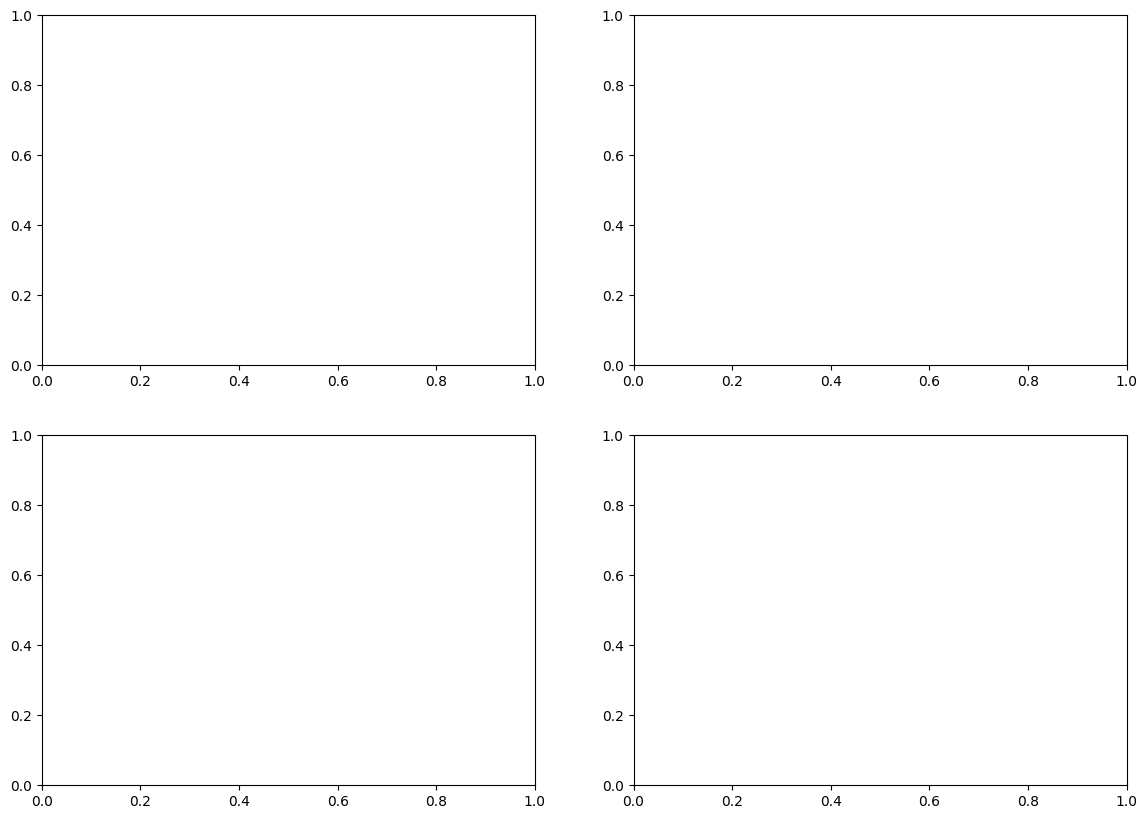

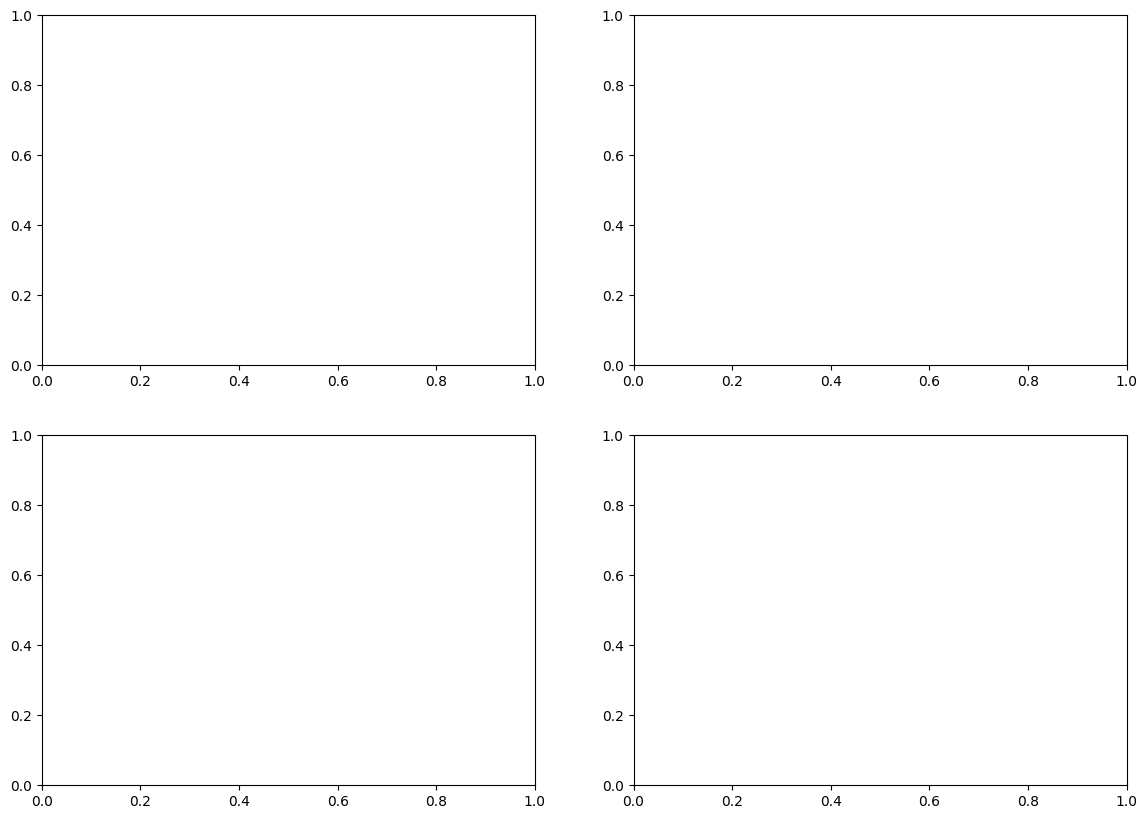

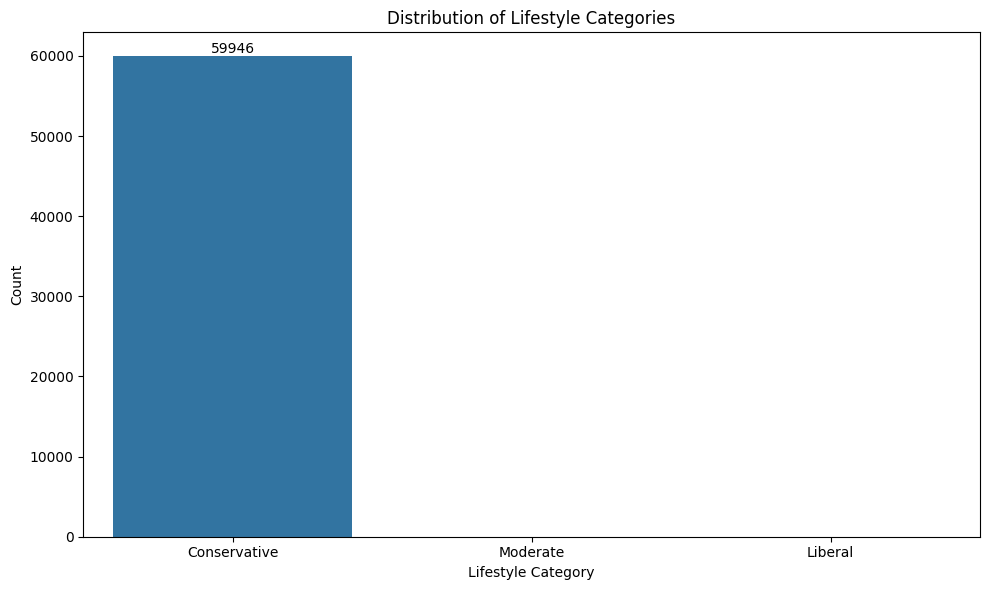

<Figure size 1200x700 with 0 Axes>

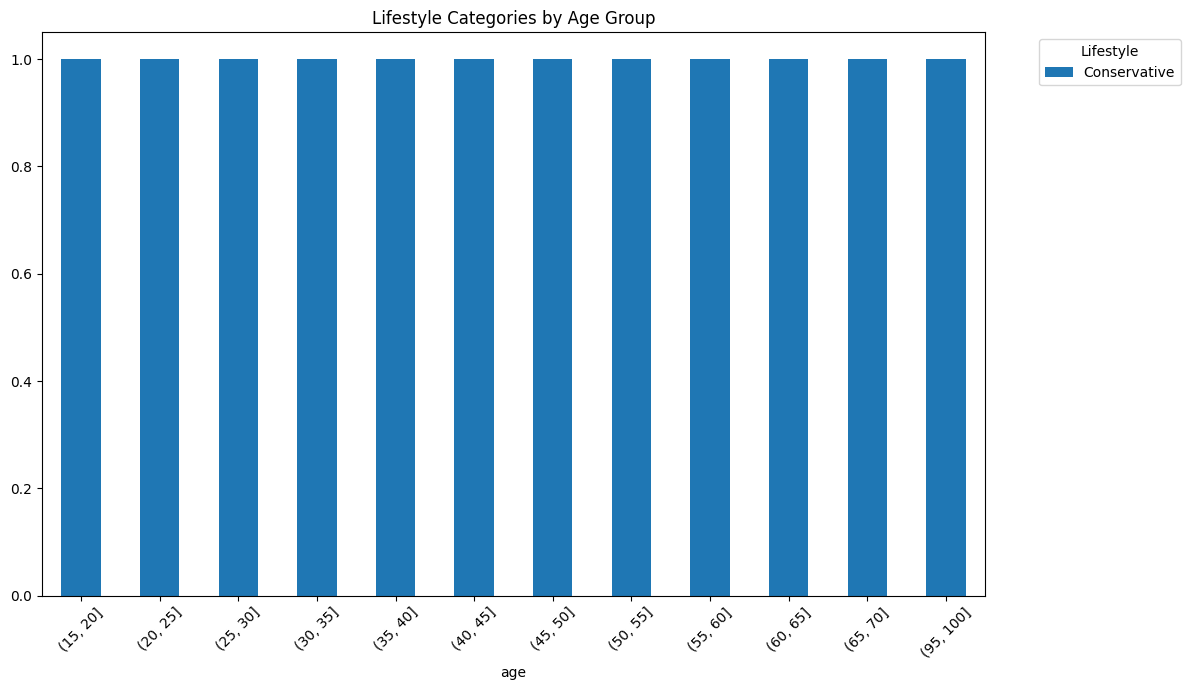

<Figure size 1000x600 with 0 Axes>

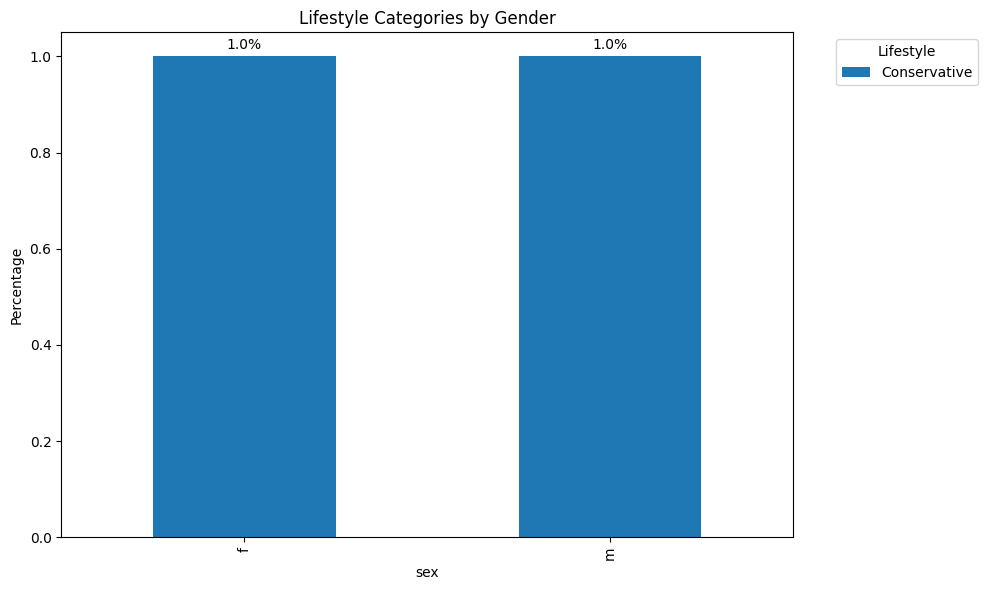

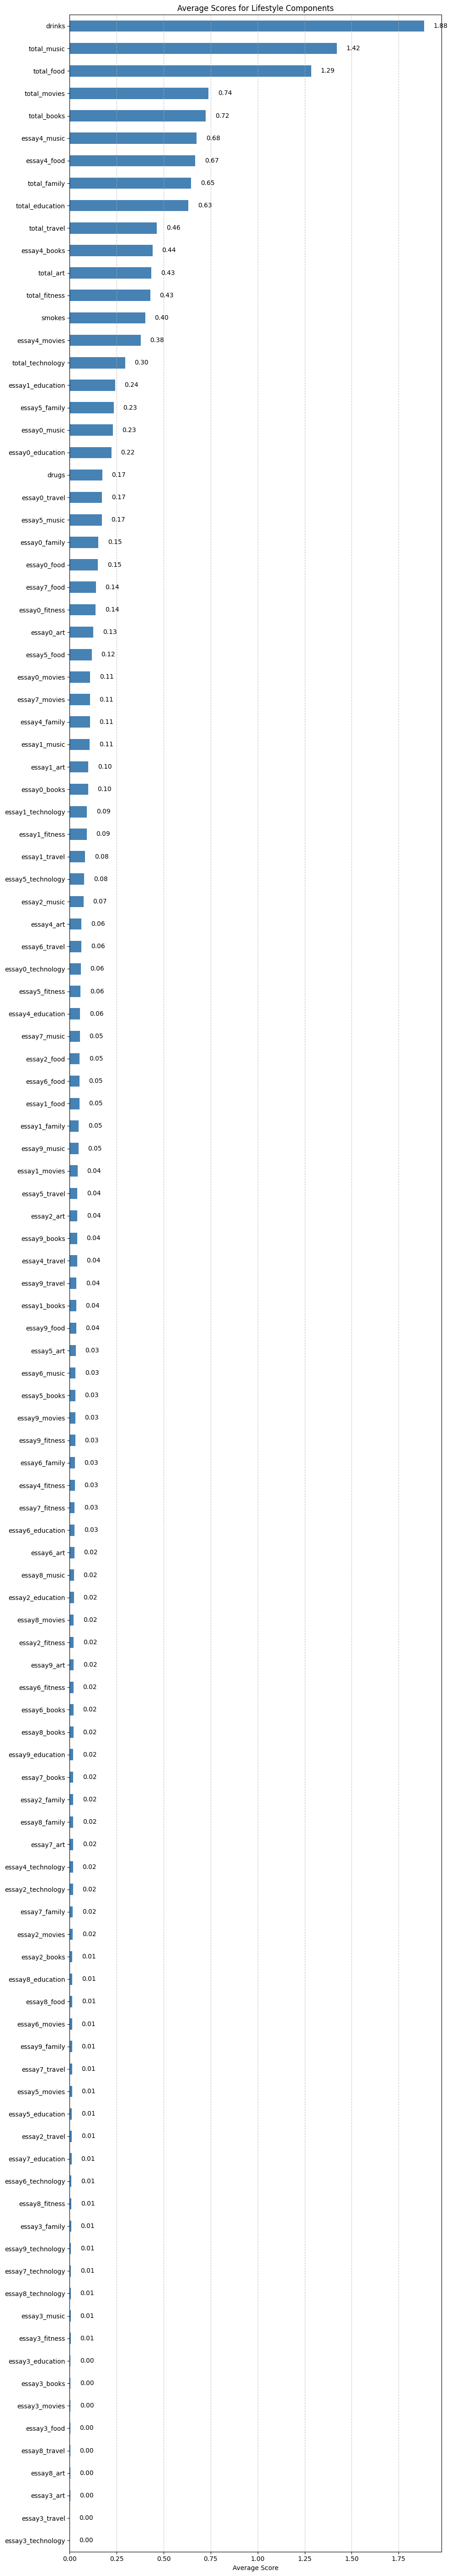

In [87]:
new_df = create_lifestyle_indicators(df_processed)
analyze_lifestyle_patterns(new_df)

In [94]:
new_df['job'].unique()

array(['transportation', 'hospitality / travel',
       'construction / craftsmanship', 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'medicine / health', 'executive / management',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other',
       'science / tech / engineering', 'education / academia',
       'clerical / administrative', 'rather not say',
       'political / government', 'law / legal services', 'military',
       'unemployed', 'retired'], dtype=object)

In [95]:
def create_socioeconomic_indicators(df):
    """
    Create socioeconomic composite indicators combining education, job, and income data
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing education, job, and income columns
    
    Returns:
    --------
    pandas DataFrame
        DataFrame with added socioeconomic indicators
    """
    # Make a copy to avoid modifying the original dataframe
    result_df = df.copy()
    
    # Define mappings for education levels
    education_mapping = {
        'dropped out of high school': 0,
        'working on high school': 1,
        'high school': 2,
        'graduated from high school': 2,
        'dropped out of two-year college': 3,
        'two-year college': 4,
        'working on two-year college': 4,
        'dropped out of college/university': 4,
        'graduated from two-year college': 5,
        'working on college/university': 6,
        'college/university': 6,
        'dropped out of law school': 6,
        'dropped out of med school': 6,
        'dropped out of masters program': 6,
        'graduated from college/university': 7,
        'working on law school': 7,
        'working on med school': 7,
        'working on masters program': 7,
        'law school': 7,
        'med school': 7,
        'masters program': 7,
        'graduated from law school': 8,
        'graduated from med school': 8,
        'graduated from masters program': 8,
        'dropped out of ph.d program': 8,
        'working on ph.d program': 9,
        'ph.d program': 9,
        'graduated from ph.d program': 10
    }

    # Define mappings for job categories
    job_mapping = {
        'unemployed': 0,
        'retired': 1,
        'student': 2,
        'clerical / administrative': 3,
        'transportation': 3,
        'hospitality / travel': 3,
        'construction / craftsmanship': 4,
        'military': 4,
        'other': 5,
        'artistic / musical / writer': 5,
        'entertainment / media': 5,
        'sales / marketing / biz dev': 6,
        'education / academia': 6,
        'political / government': 6,
        'law / legal services': 7,
        'medicine / health': 8,
        'banking / financial / real estate': 8,
        'science / tech / engineering': 8,
        'computer / hardware / software': 8,
        'executive / management': 9
    }

    # Define columns to process
    columns_to_process = ['education', 'job', 'income']
    mappings = {
        'education': education_mapping,
        'job': job_mapping
    }
    
    # Create numerical versions of categorical columns
    for col in ['education', 'job']:
        if col in result_df.columns:
            # Create new column with '_score' suffix
            score_col = f'{col}_score'
            result_df[score_col] = result_df[col].map(mappings[col])
            
            # Fill missing values with median of non-missing values
            median_value = result_df[score_col].median()
            if pd.isna(median_value):  # If all values are NA
                median_value = 0
            result_df[score_col] = result_df[score_col].fillna(median_value)

    # Process income separately - normalize to a 0-10 scale to match other metrics
    if 'income' in result_df.columns:
        # Cap income at 250,000 to prevent outliers from skewing the scale
        capped_income = result_df['income'].clip(upper=250000)
        # Scale to 0-10 range
        result_df['income_score'] = (capped_income / 25000).clip(upper=10)
        # Fill missing values with median
        result_df['income_score'] = result_df['income_score'].fillna(result_df['income_score'].median())
    
    # Calculate socioeconomic indicator with weighted components
    socioeconomic_columns = ['education_score', 'job_score', 'income_score']
    
    # Check if we have all the required columns
    if all(col in result_df.columns for col in socioeconomic_columns):
        # Calculate weighted score - education (30%), job (30%), income (40%)
        result_df['socioeconomic_score'] = (
            0.3 * result_df['education_score'] + 
            0.3 * result_df['job_score'] + 
            0.4 * result_df['income_score']
        )
        
        # Create categorized version
        # Define reasonable bin boundaries for the combined score
        bins = [0, 3, 6, 10]  # Adjusted for the weighted scale
        labels = ['Lower', 'Middle', 'Upper']
        
        result_df['socioeconomic_category'] = pd.cut(
            result_df['socioeconomic_score'], 
            bins=bins, 
            labels=labels,
            include_lowest=True
        )
        
        # Calculate normalized score (0-1 scale)
        result_df['socioeconomic_index'] = result_df['socioeconomic_score'] / 10
    
    return result_df

def analyze_socioeconomic_patterns(df):
    """
    Analyze patterns in socioeconomic indicators across demographics
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with socioeconomic indicators
    """
    if 'socioeconomic_category' not in df.columns:
        print("Run create_socioeconomic_indicators first to generate categories")
        return
    
    # Visualize socioeconomic category distribution
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='socioeconomic_category')
    
    # Add count labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'bottom')
                   
    plt.title('Distribution of Socioeconomic Categories')
    plt.xlabel('Socioeconomic Category')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Analyze relationships with age
    if 'age' in df.columns:
        plt.figure(figsize=(12, 7))
        if hasattr(df['age'], 'cat') or df['age'].dtype.name == 'category':
            # Age is already categorized
            ct = pd.crosstab(df['age'], df['socioeconomic_category'], normalize='index')
            ct.plot(kind='bar', stacked=True, figsize=(12, 7))
            plt.title('Socioeconomic Categories by Age Group')
            plt.legend(title='Socioeconomic', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.xticks(rotation=45)
        else:
            # Create age groups if age is numeric
            sns.boxplot(x='socioeconomic_category', y='age', data=df)
            plt.title('Age Distribution by Socioeconomic Category')
        plt.tight_layout()
        plt.show()
    
    # Analyze relationships with sex
    if 'sex' in df.columns:
        plt.figure(figsize=(10, 6))
        cross_tab = pd.crosstab(df['sex'], df['socioeconomic_category'])
        cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0)
        ax = cross_tab_pct.plot(kind='bar', figsize=(10, 6))
        
        # Add percentage labels
        for i, container in enumerate(ax.containers):
            ax.bar_label(container, fmt='%.1f%%', padding=3)
            
        plt.title('Socioeconomic Categories by Gender')
        plt.ylabel('Percentage')
        plt.legend(title='Socioeconomic', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    
    # Show average scores for each component
    socioeconomic_cols = ['education_score', 'job_score', 'income_score']
    if all(col in df.columns for col in socioeconomic_cols):
        # Increase figure height to accommodate labels
        plt.figure(figsize=(10, 5))
        
        # Get mean values and sort
        mean_scores = df[socioeconomic_cols].mean().sort_values()
        
        # Create custom bar chart with better spacing
        ax = mean_scores.plot(kind='barh', color='steelblue')
        
        # Clean up the y-axis labels
        labels = [label.replace('_score', '') for label in mean_scores.index]
        ax.set_yticklabels(labels, fontsize=12)
        
        # Add value labels at the end of each bar
        for i, v in enumerate(mean_scores):
            ax.text(v + 0.05, i, f'{v:.2f}', va='center')
        
        plt.title('Average Scores for Socioeconomic Components')
        plt.xlabel('Average Score')
        
        # Add grid lines for better readability
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        
        # Ensure proper spacing
        plt.tight_layout()
        plt.show()
        
        # Show correlation between components
        plt.figure(figsize=(8, 6))
        sns.heatmap(df[socioeconomic_cols + ['socioeconomic_score']].corr(), 
                    annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Between Socioeconomic Components')
        plt.tight_layout()
        plt.show()

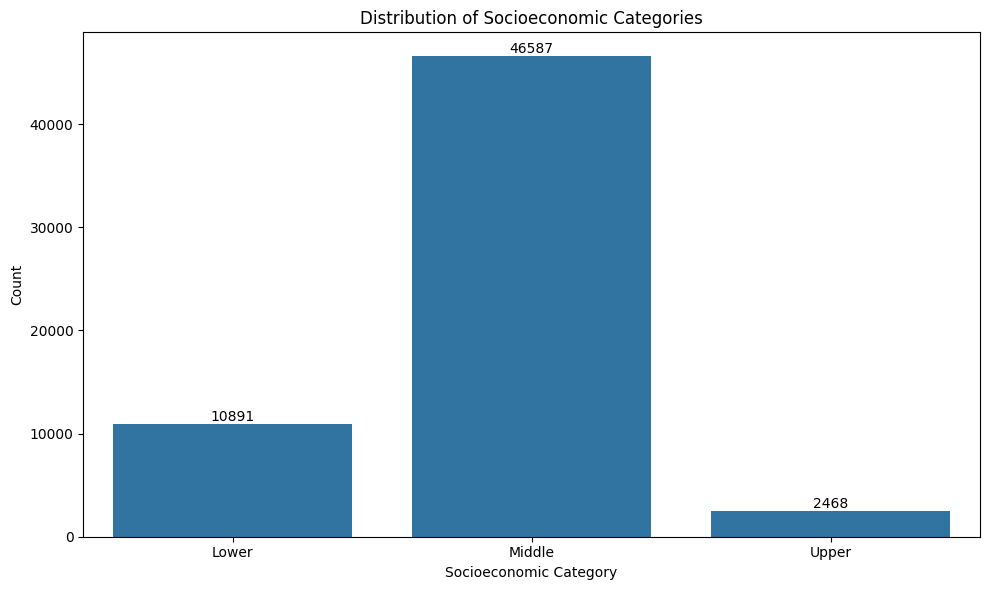

<Figure size 1200x700 with 0 Axes>

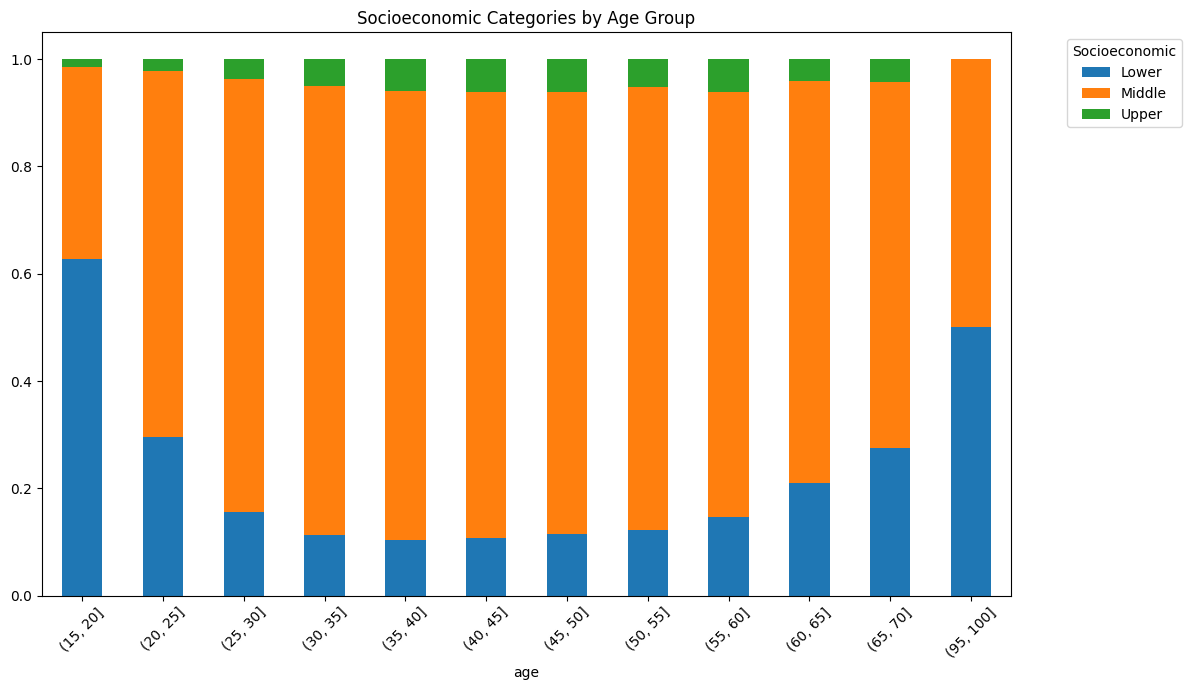

<Figure size 1000x600 with 0 Axes>

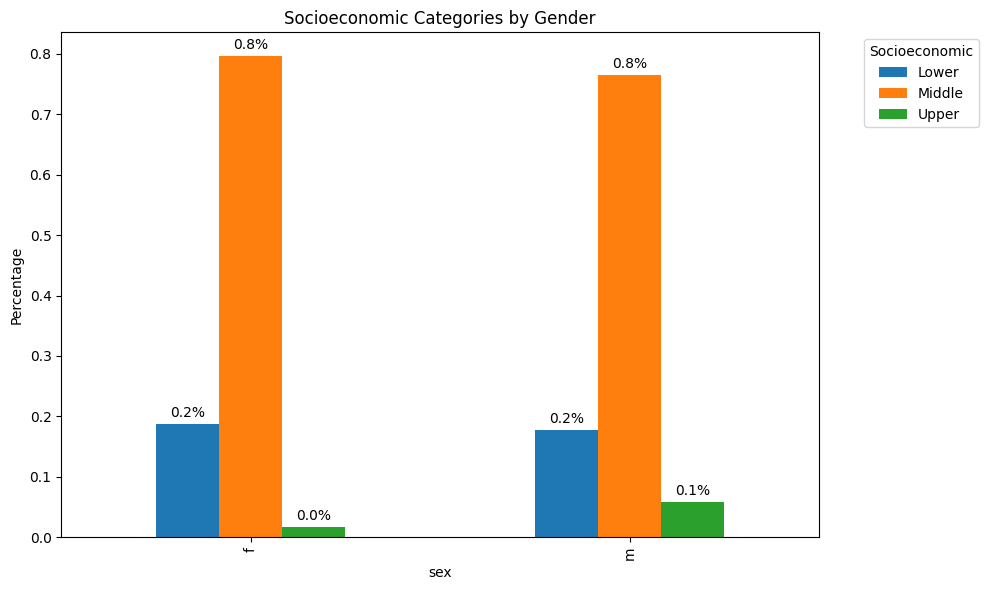

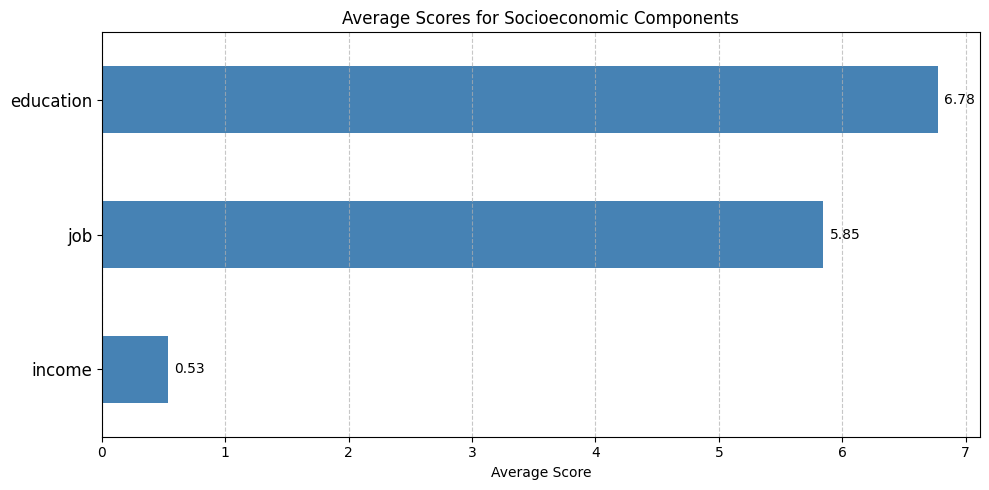

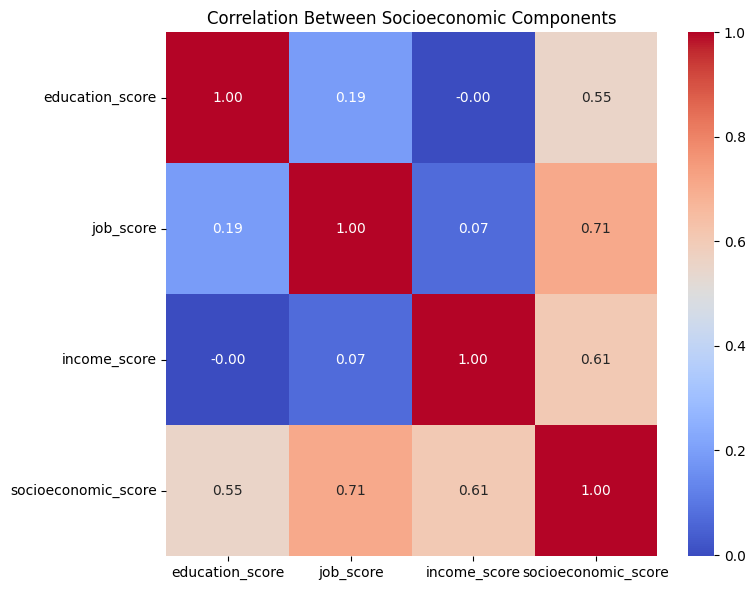

In [96]:
new_df = create_socioeconomic_indicators(new_df)
analyze_socioeconomic_patterns(new_df)

In [97]:
new_df['socioeconomic_score'].head()

0    2.70
1    4.28
2    3.60
3    2.72
4    3.60
Name: socioeconomic_score, dtype: float64